In [1]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import datetime, timedelta
import os

/Users/gumi/opt/anaconda3/lib/python3.9/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [2]:
connection_string = 'sqlite:///data/data.db'
tokens = pd.read_sql('''
SELECT 
    token 
FROM
    ohlc
''', connection_string)

tokens = tokens['token'].unique().tolist()

In [3]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

In [4]:
date_list = pd.read_sql('''
SELECT 
    ts
FROM 
    ohlc
''', connection_string)

date_list = date_list['ts'].tolist()
date_list = [i[:10] for i in date_list]
date_list = sorted(list(set(date_list)))
date_list = [datetime.strptime(i, '%Y-%m-%d') for i in date_list]
date_list[-17:]

[datetime.datetime(2021, 11, 29, 0, 0),
 datetime.datetime(2021, 11, 30, 0, 0),
 datetime.datetime(2021, 12, 1, 0, 0),
 datetime.datetime(2021, 12, 2, 0, 0),
 datetime.datetime(2021, 12, 3, 0, 0),
 datetime.datetime(2021, 12, 4, 0, 0),
 datetime.datetime(2021, 12, 5, 0, 0),
 datetime.datetime(2021, 12, 6, 0, 0),
 datetime.datetime(2021, 12, 7, 0, 0),
 datetime.datetime(2021, 12, 8, 0, 0),
 datetime.datetime(2021, 12, 9, 0, 0),
 datetime.datetime(2021, 12, 10, 0, 0),
 datetime.datetime(2021, 12, 11, 0, 0),
 datetime.datetime(2021, 12, 12, 0, 0),
 datetime.datetime(2021, 12, 13, 0, 0),
 datetime.datetime(2021, 12, 14, 0, 0),
 datetime.datetime(2021, 12, 15, 0, 0)]

In [5]:
[i.weekday() for i in date_list][-17:]
run_dates = [date_list[-17], date_list[-3]]
run_dates

[datetime.datetime(2021, 11, 29, 0, 0), datetime.datetime(2021, 12, 13, 0, 0)]

In [6]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [7]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=14)}', end='\r')
        res = pm.execute_notebook(
            'market_analysis_template.ipynb',
            f'{base_output_folder}/{token}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=14)}',
                'token': token,
                'connection_string': connection_string,
            }
        )

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

In [8]:
nbs = sb.read_notebooks('outputs')

In [9]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'volatility': scrap['prices'].data.volatility.mean(),
        'return': scrap['prices'].data['return'].mean(),
        'range of close price': scrap['prices'].data['close'].values[-1] - scrap['prices'].data['close'].values[0],
               }) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,volatility,return,range of close price
0,AAVE,2021-12-13 00:00:00,2021-12-27 00:00:00,0.215526,-0.001245,-10.8600
1,ADA,2021-12-13 00:00:00,2021-12-27 00:00:00,0.204701,-0.001332,-0.0866
2,ATOM,2021-12-13 00:00:00,2021-12-27 00:00:00,0.240106,-0.002534,-2.8700
3,AVAX,2021-12-13 00:00:00,2021-12-27 00:00:00,0.263696,-0.000253,-1.5200
4,BTC,2021-12-13 00:00:00,2021-12-27 00:00:00,0.148281,-0.000766,-1870.5500
5,COMP,2021-12-13 00:00:00,2021-12-27 00:00:00,0.242837,-0.001404,-13.7300
6,CRV,2021-12-13 00:00:00,2021-12-27 00:00:00,0.275861,-0.002482,-0.4500
7,DOT,2021-12-13 00:00:00,2021-12-27 00:00:00,0.219986,-0.002578,-3.5200
8,ETH,2021-12-13 00:00:00,2021-12-27 00:00:00,0.176609,-0.001500,-294.8900
9,SOL,2021-12-13 00:00:00,2021-12-27 00:00:00,0.253988,-0.001627,-13.5800


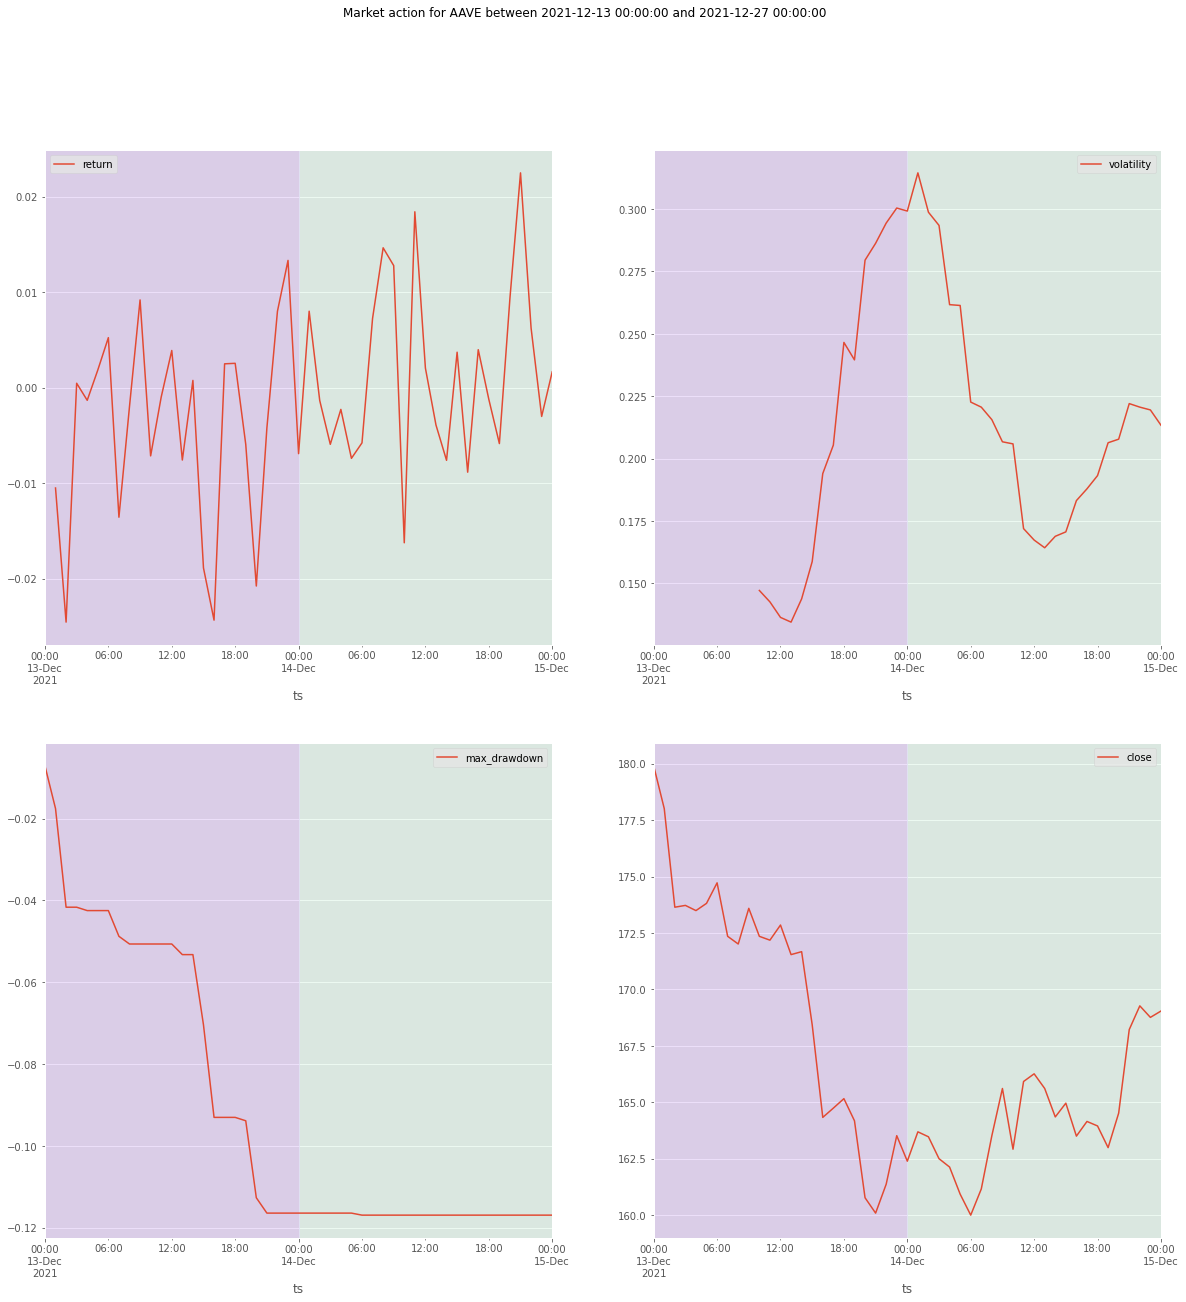

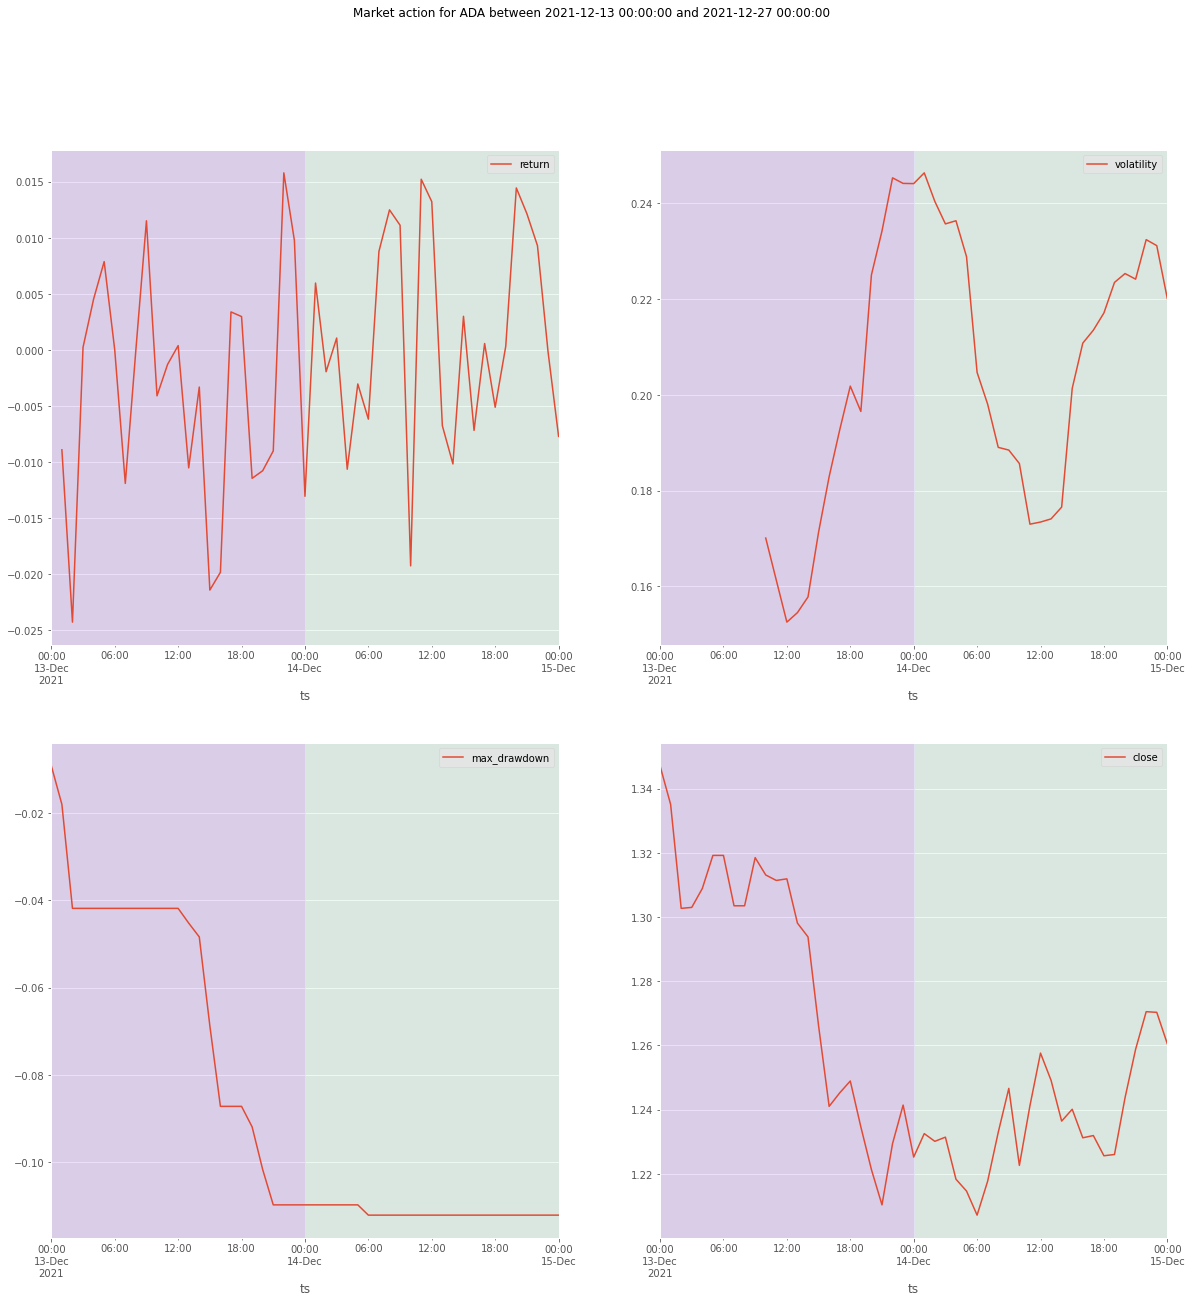

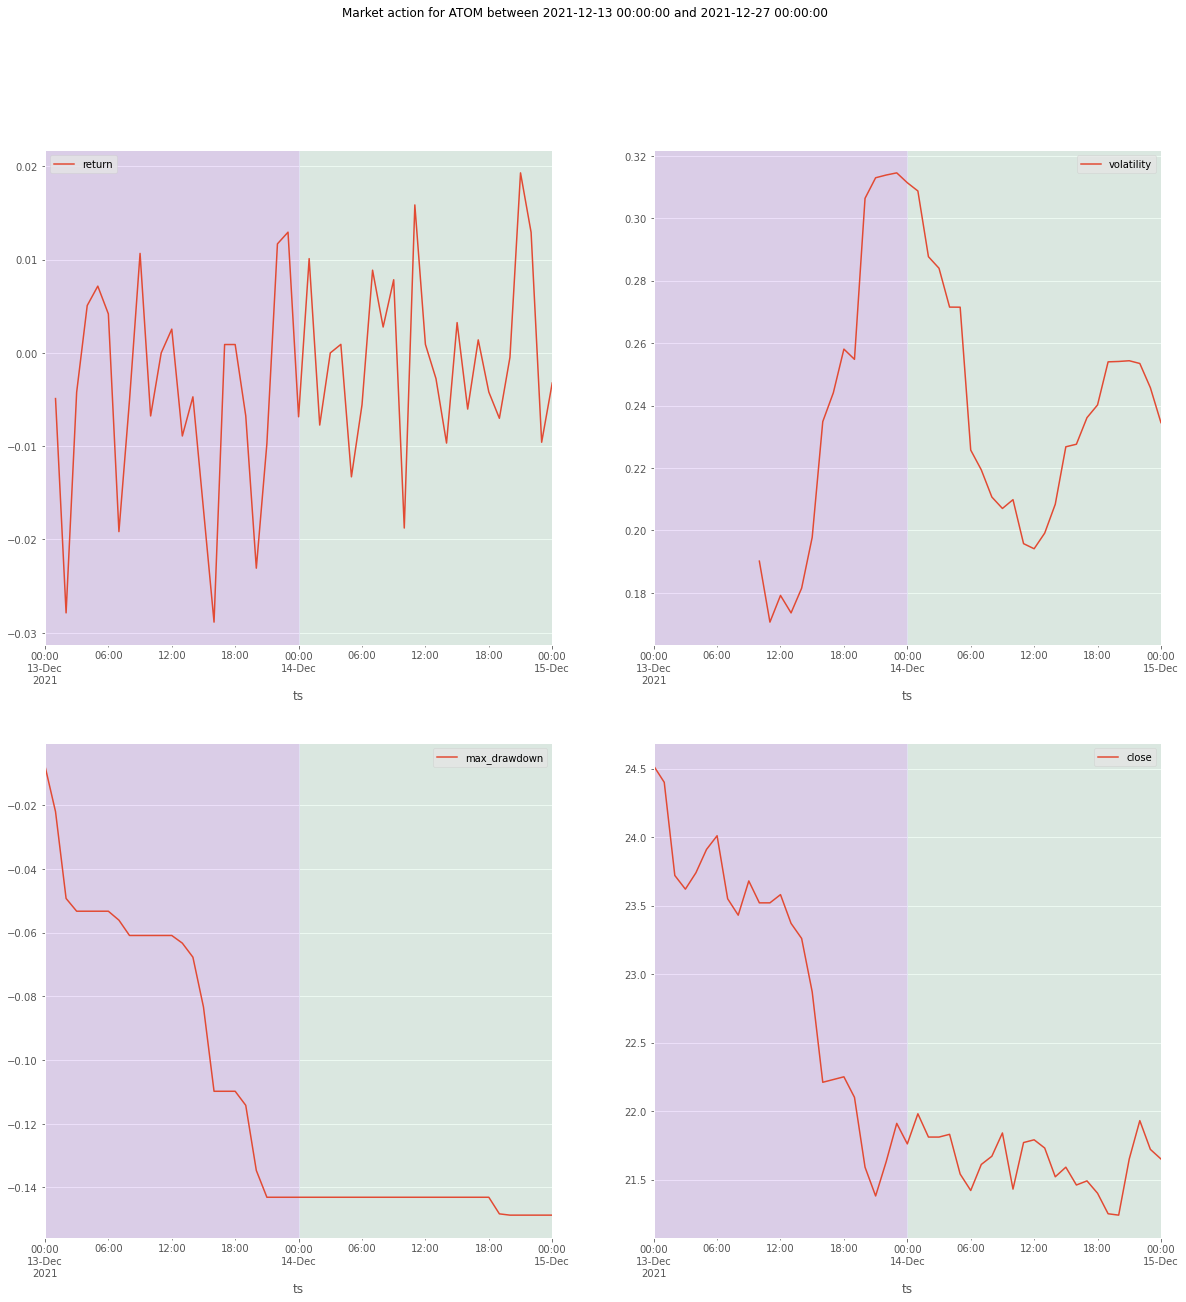

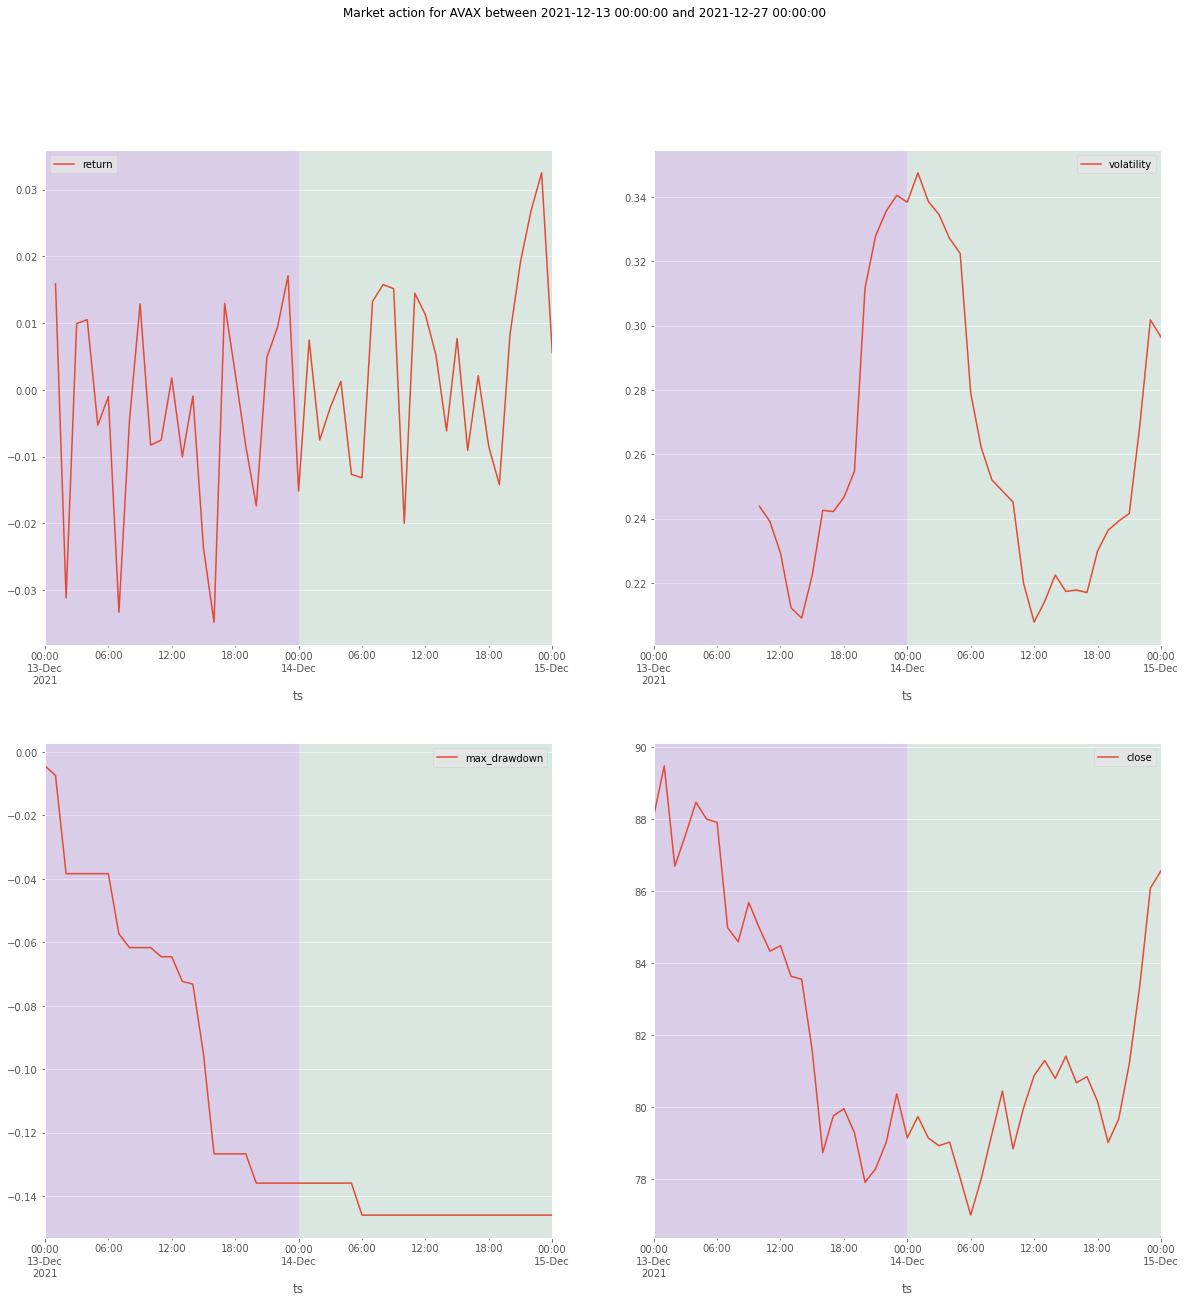

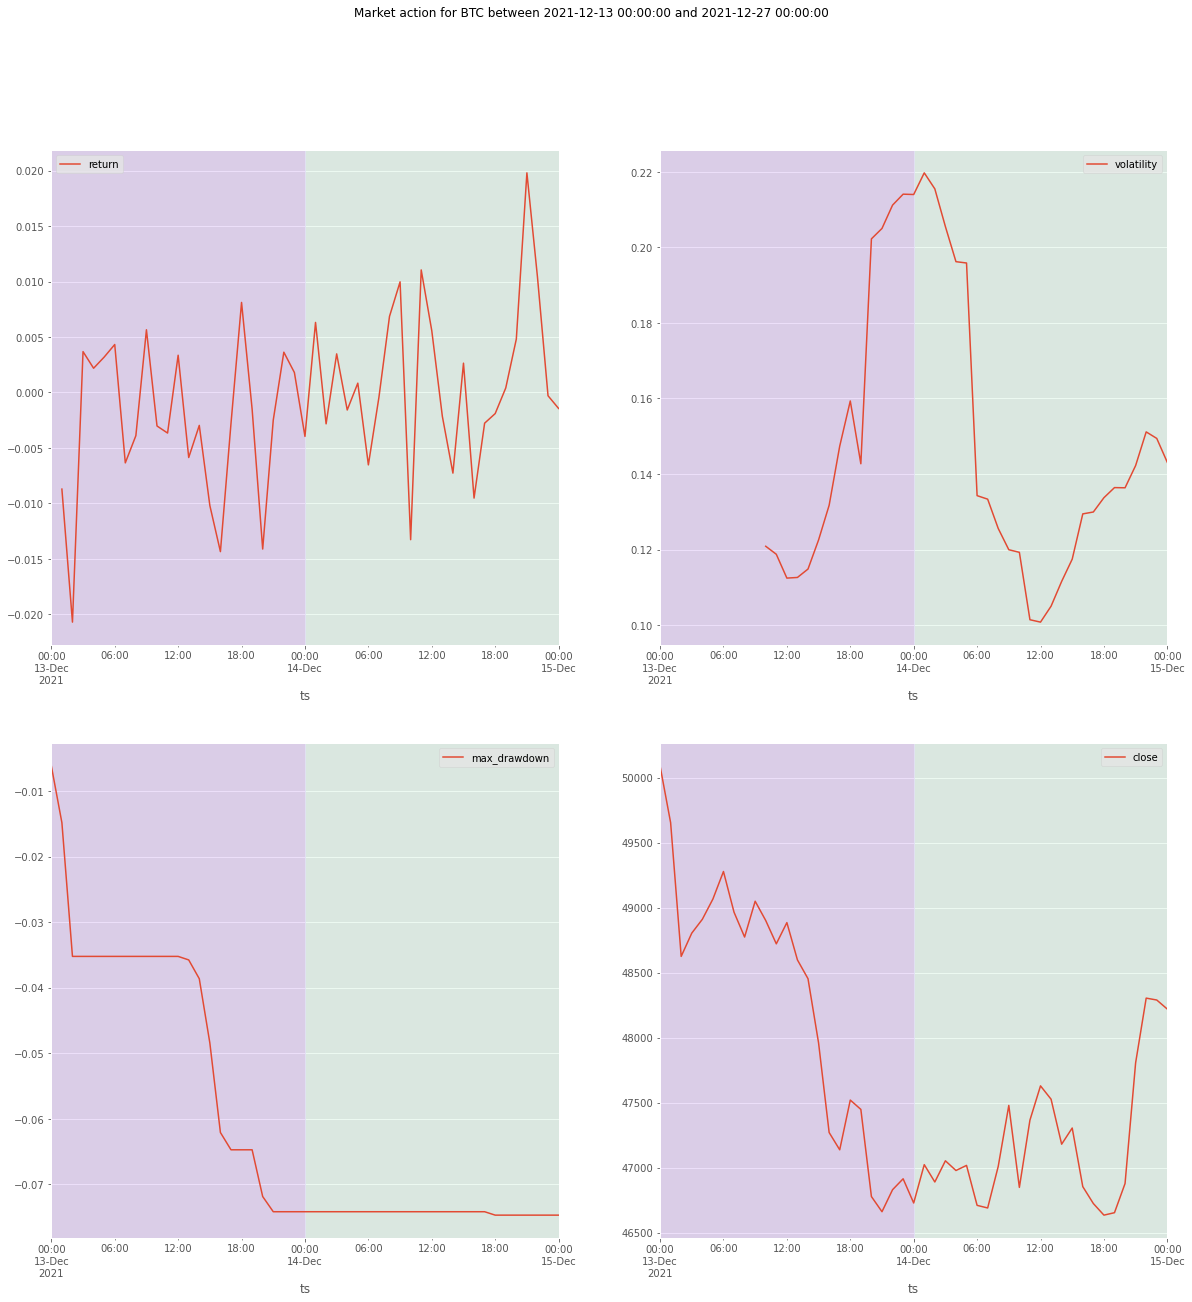

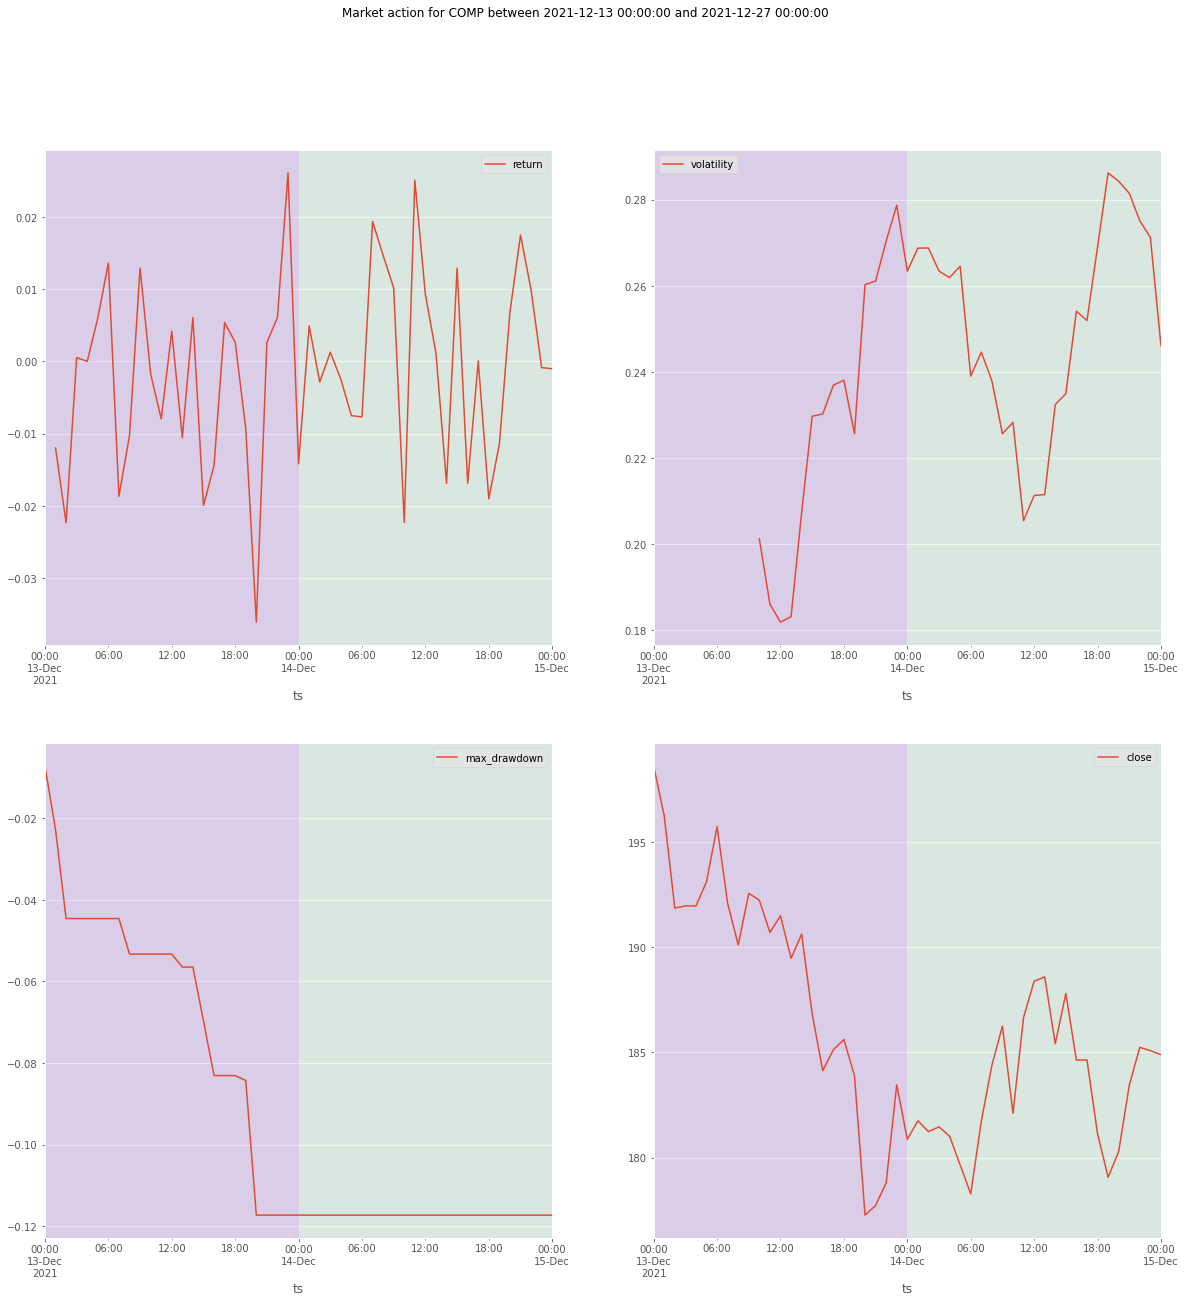

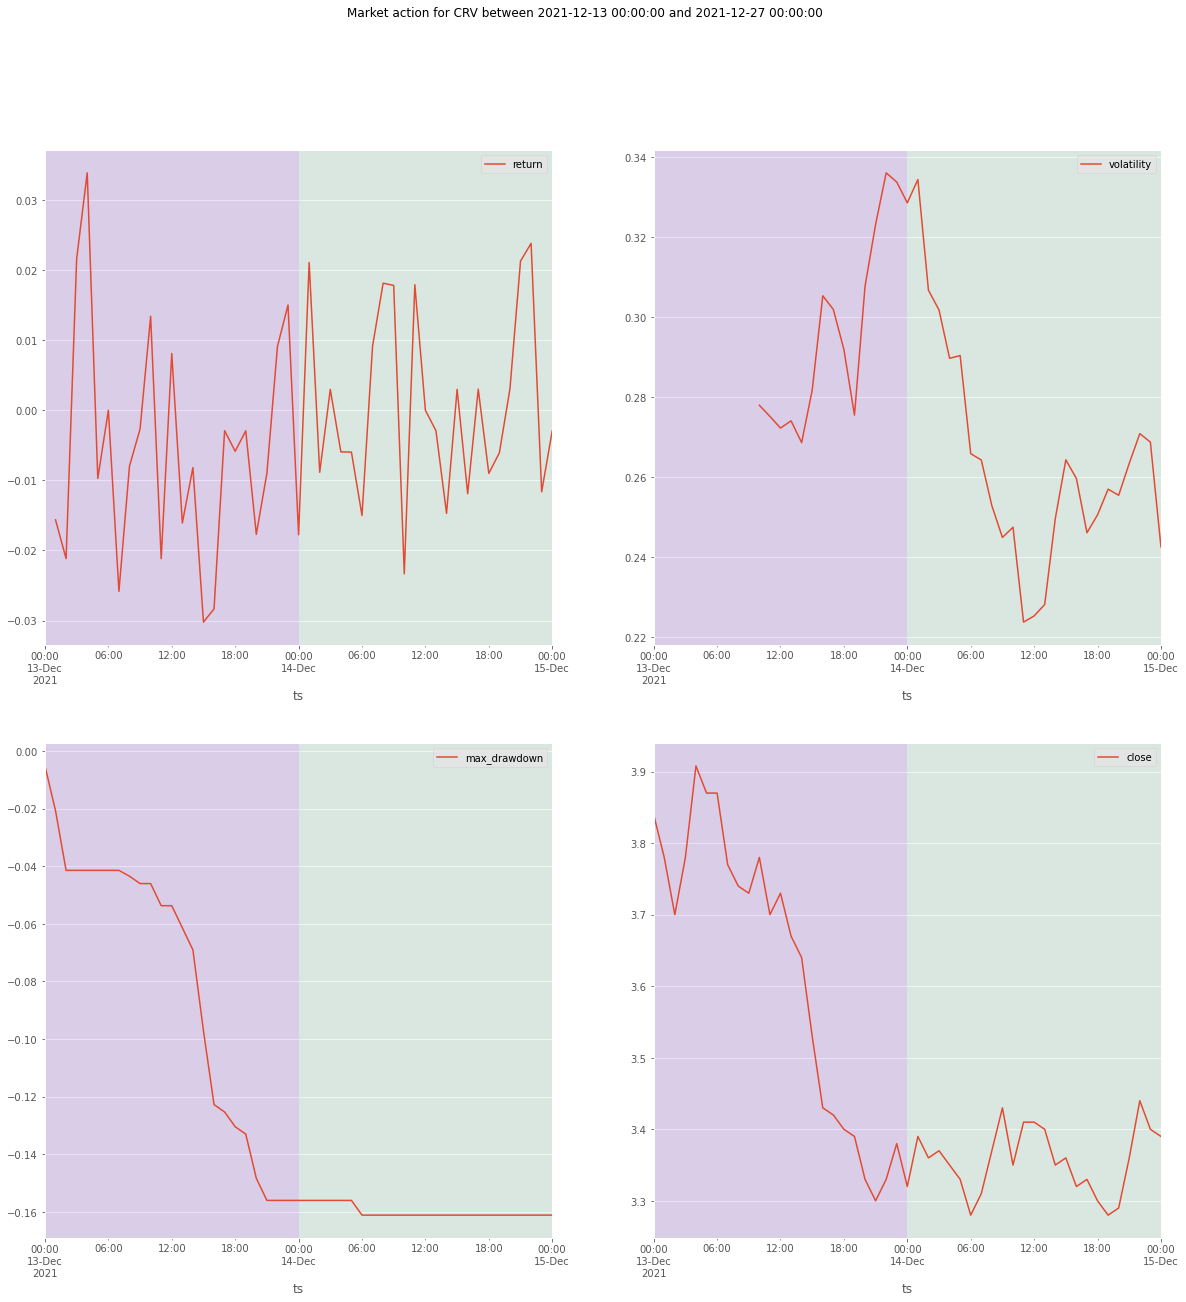

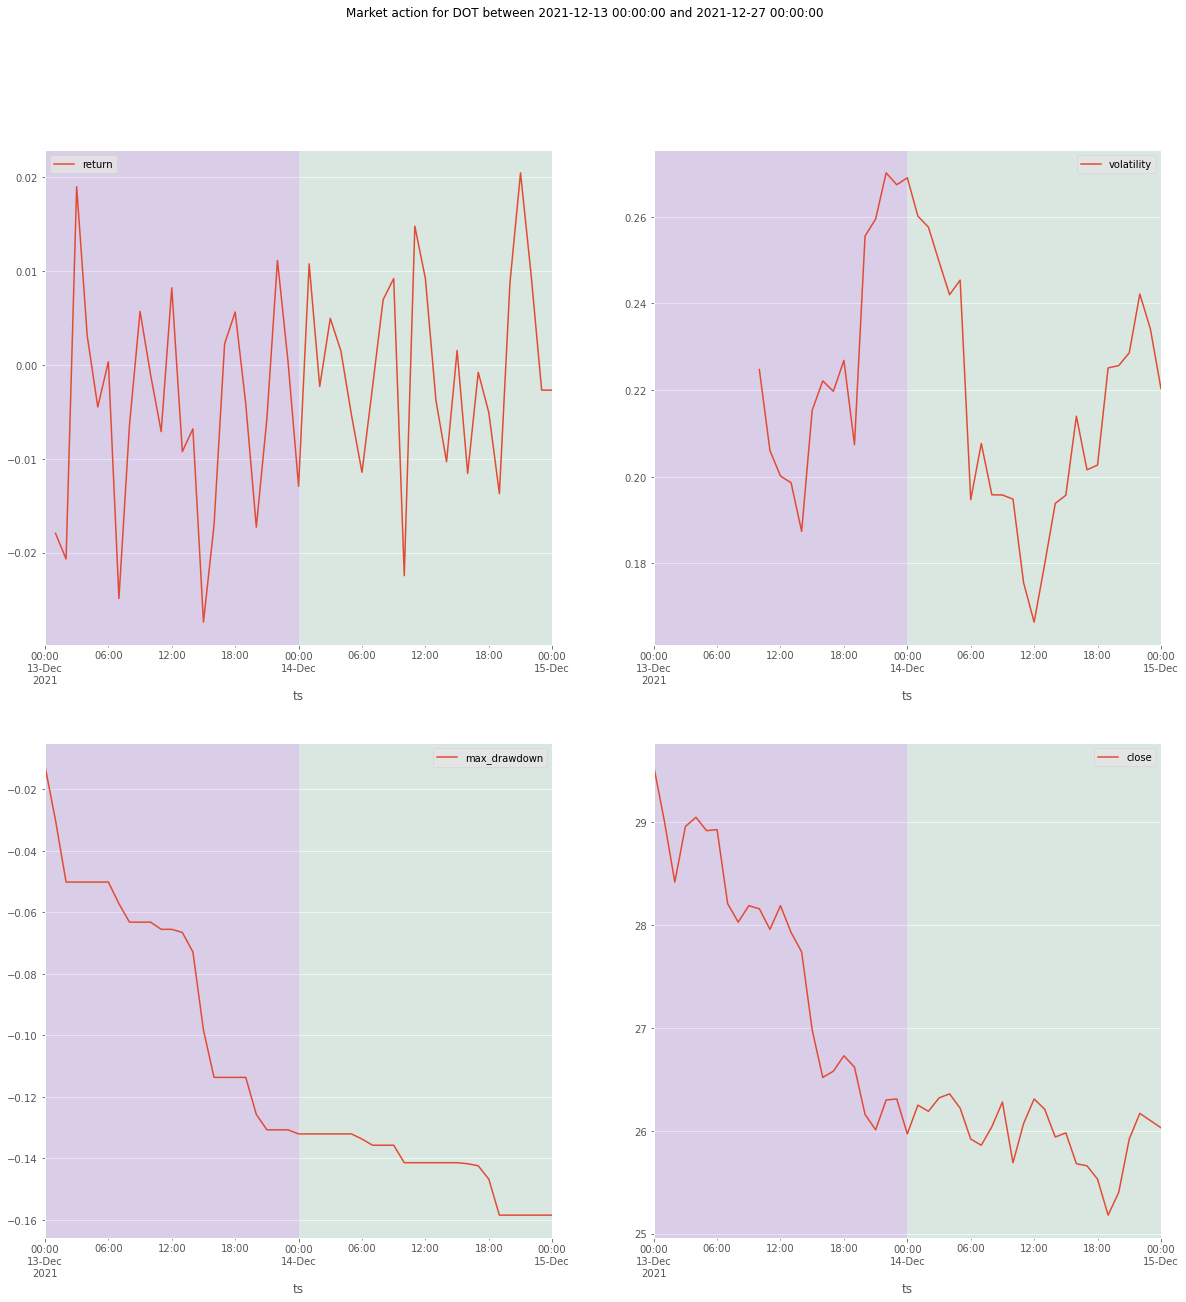

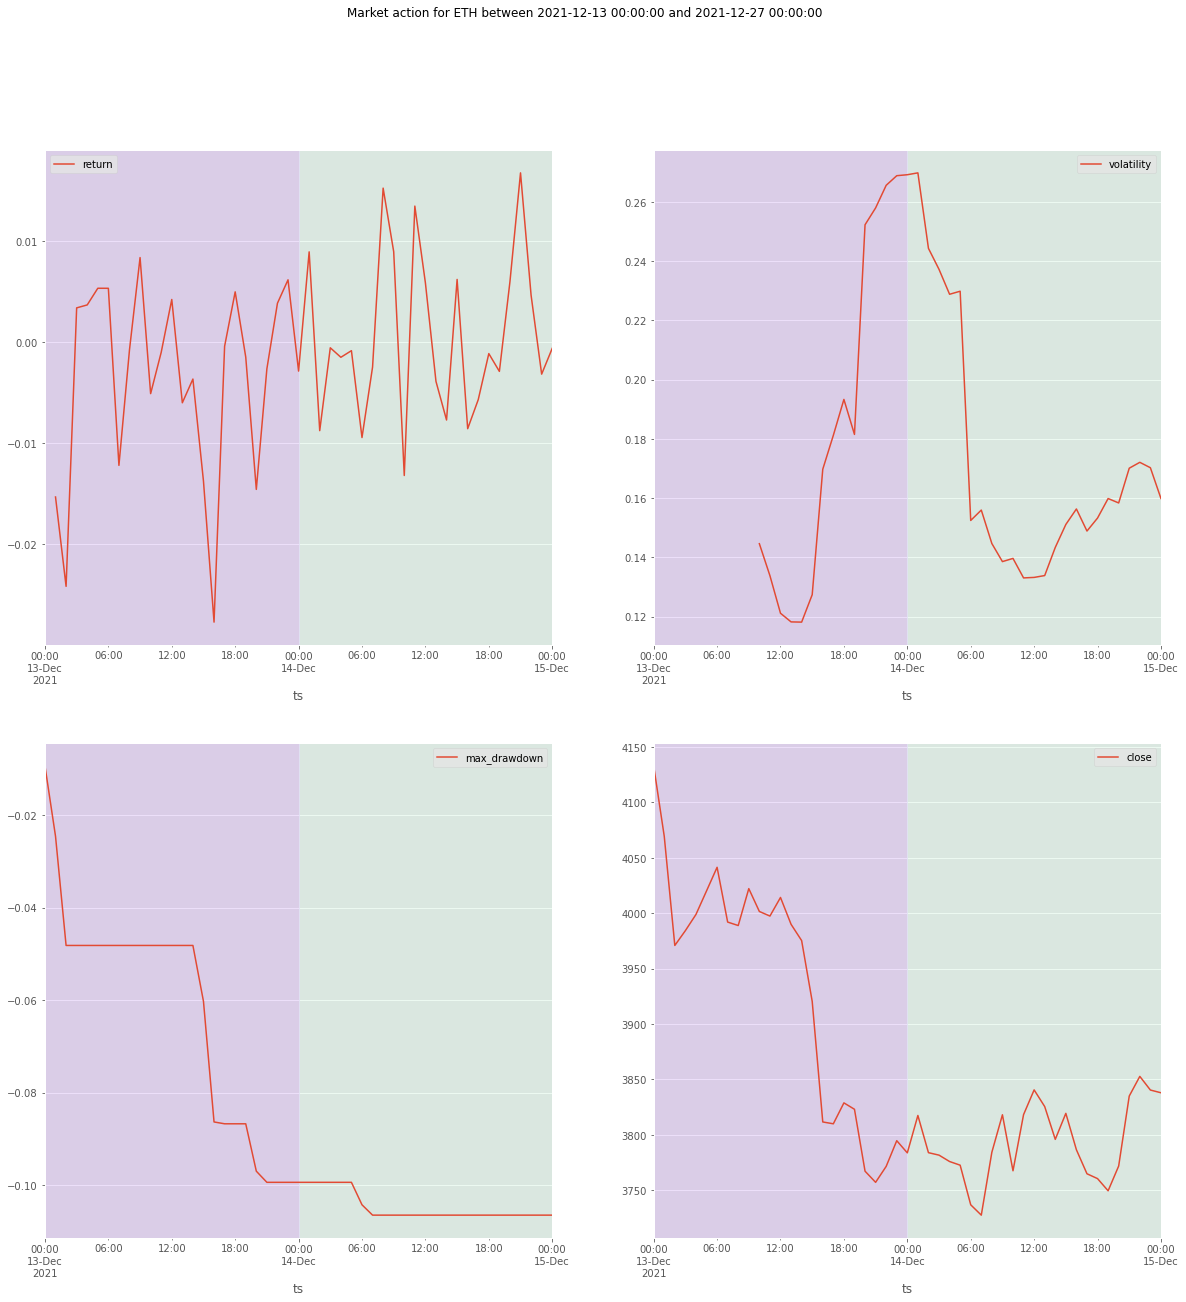

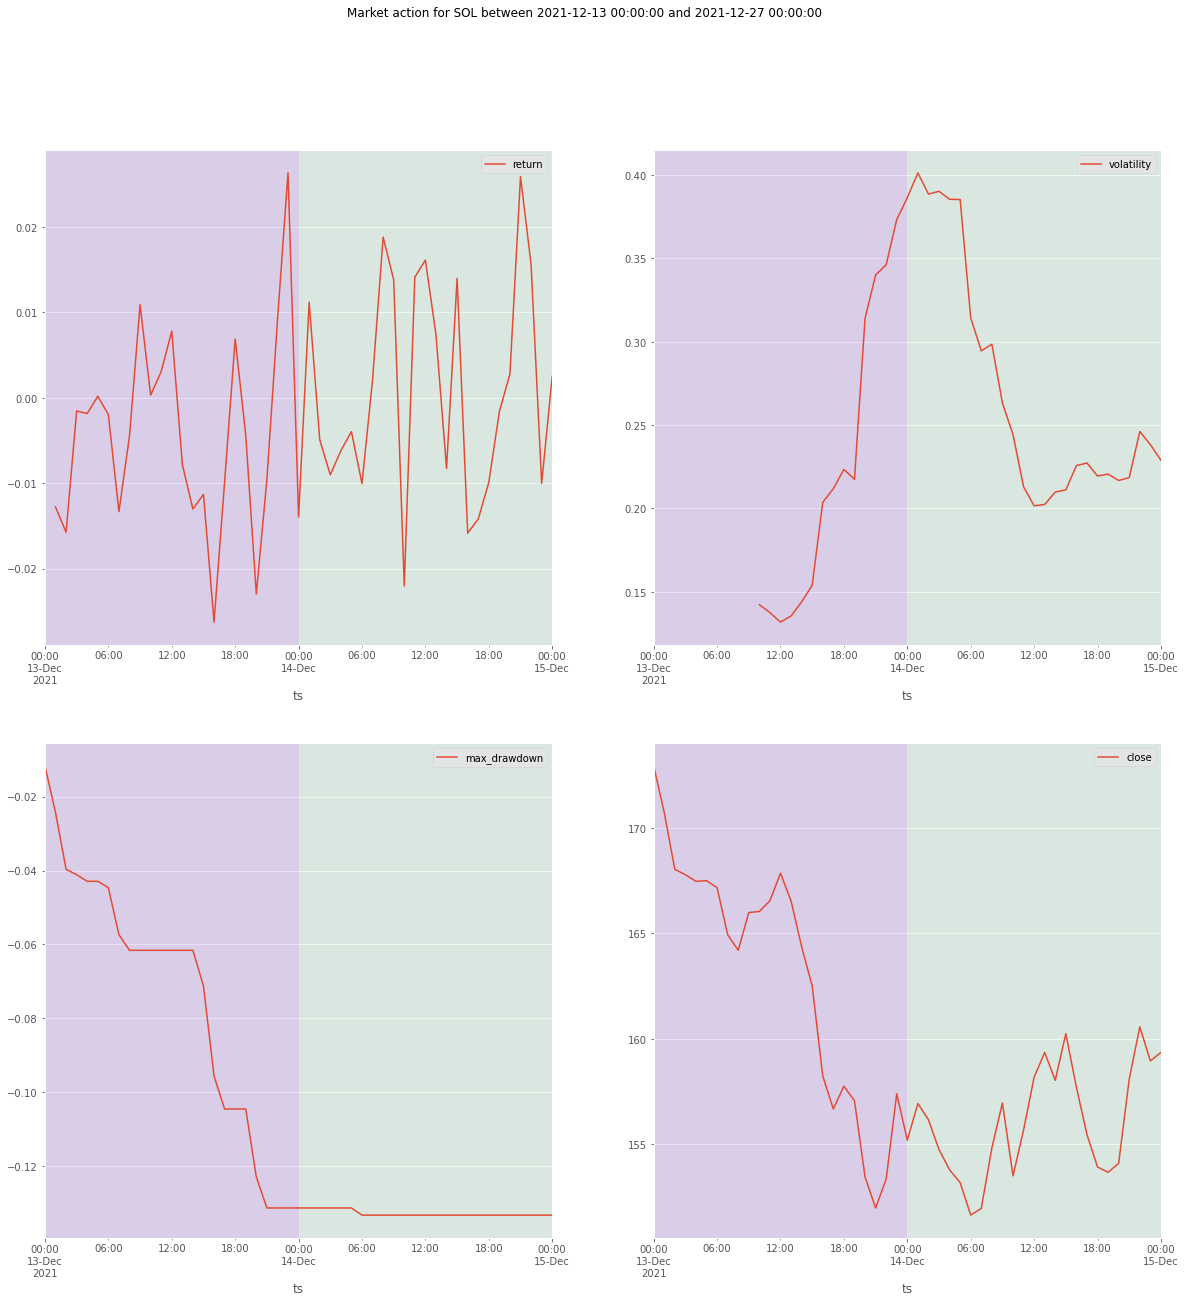

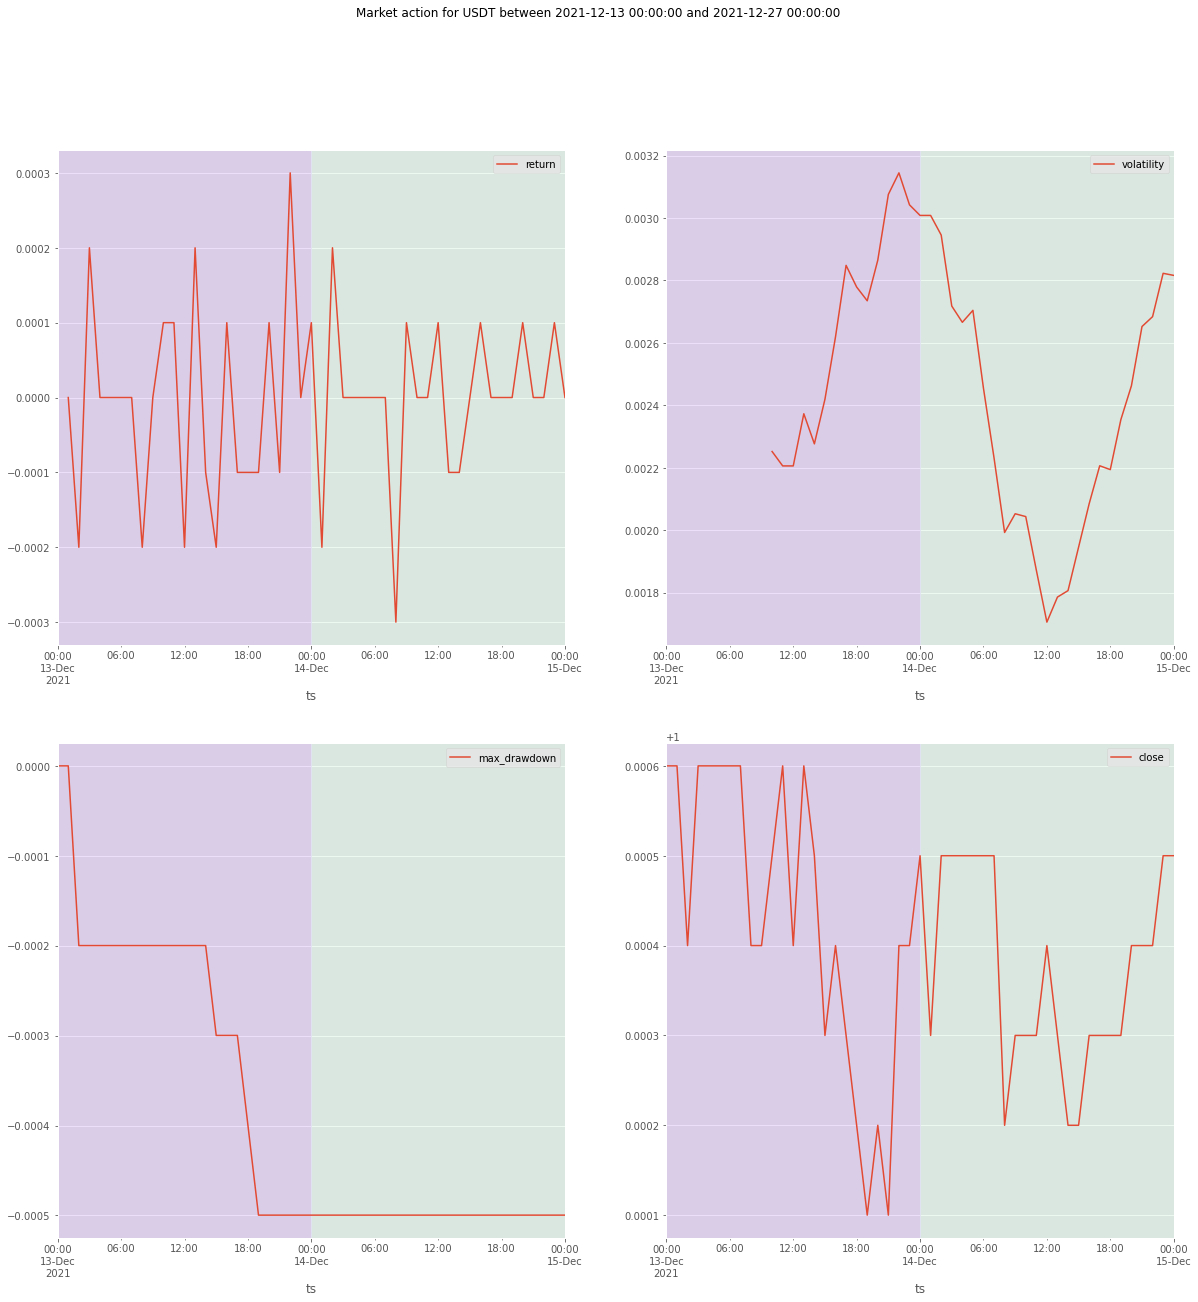

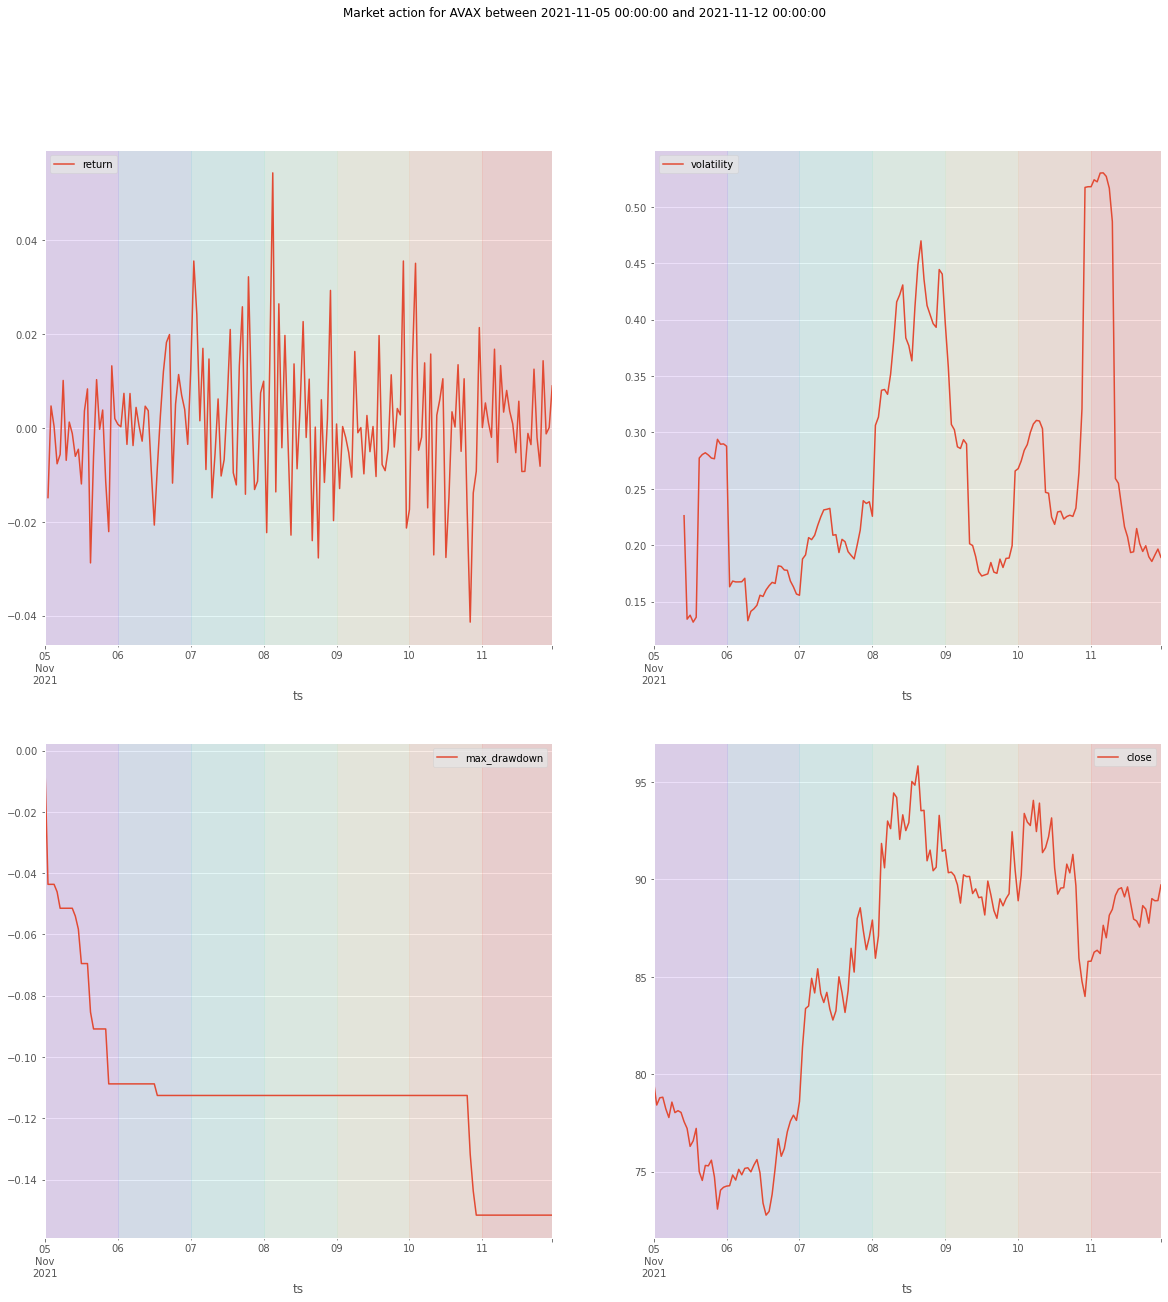

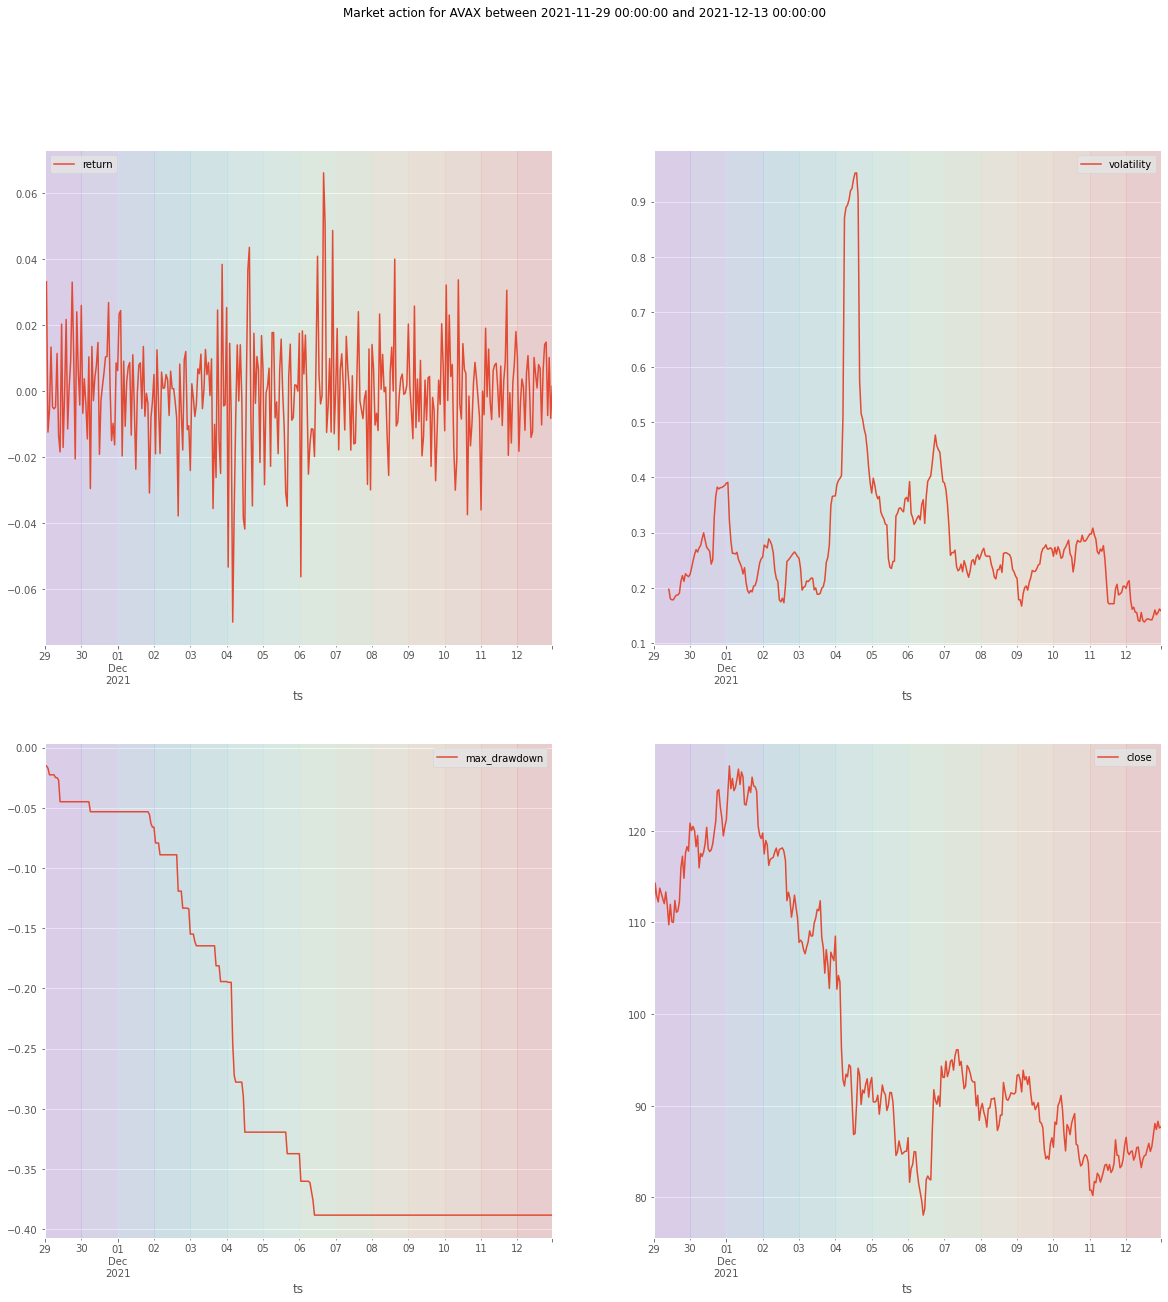

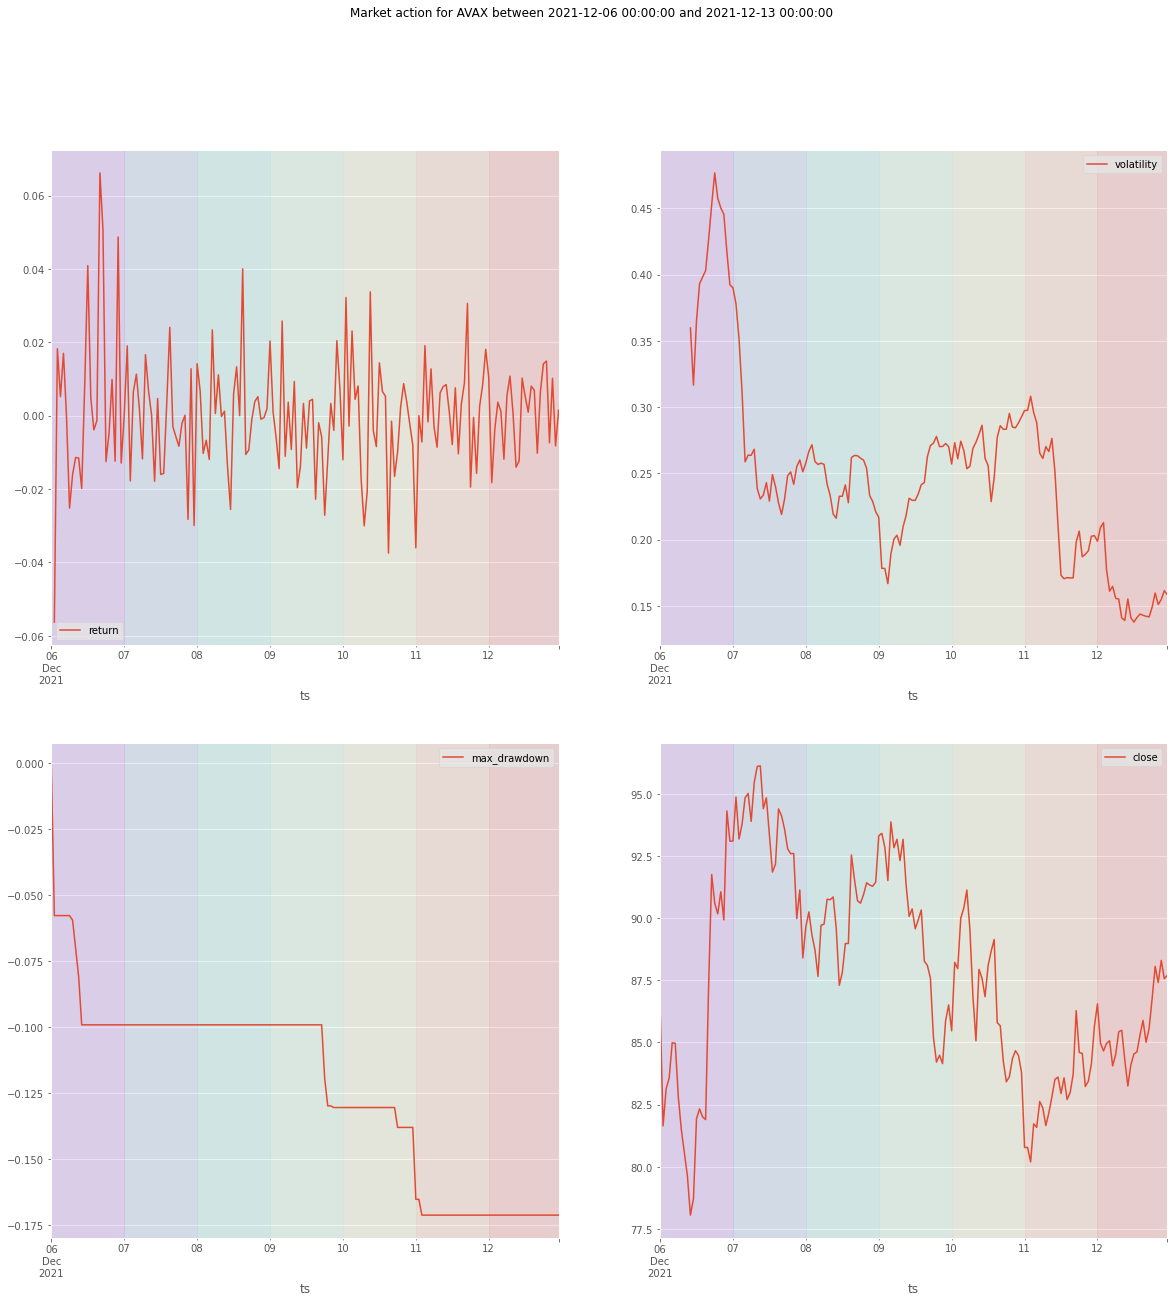

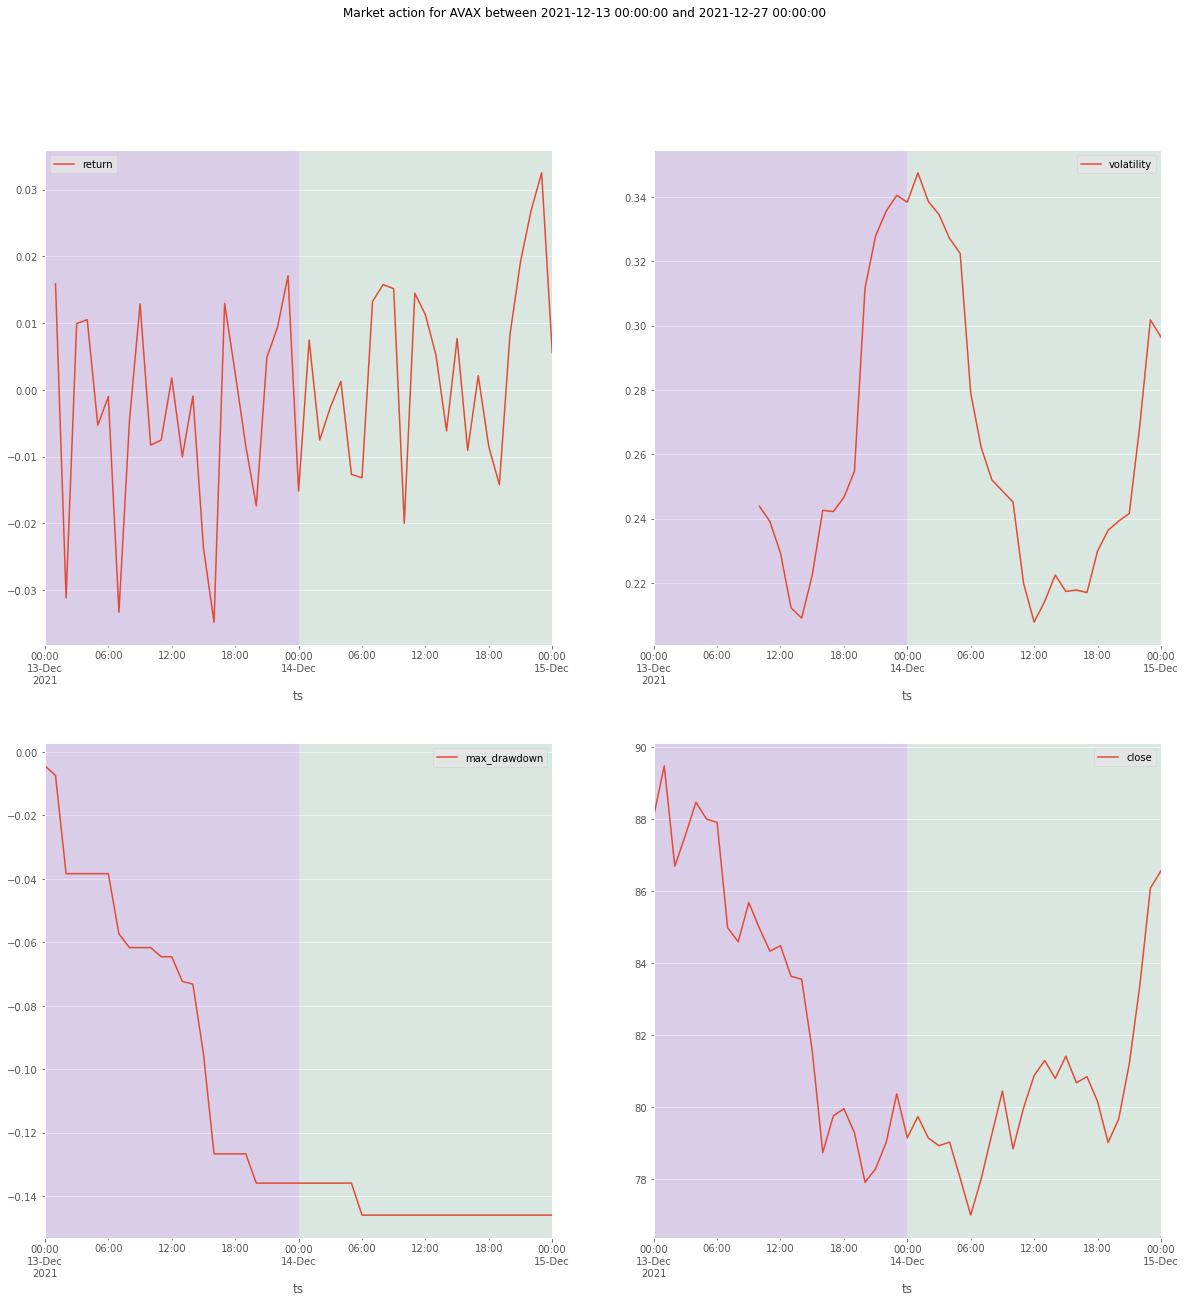

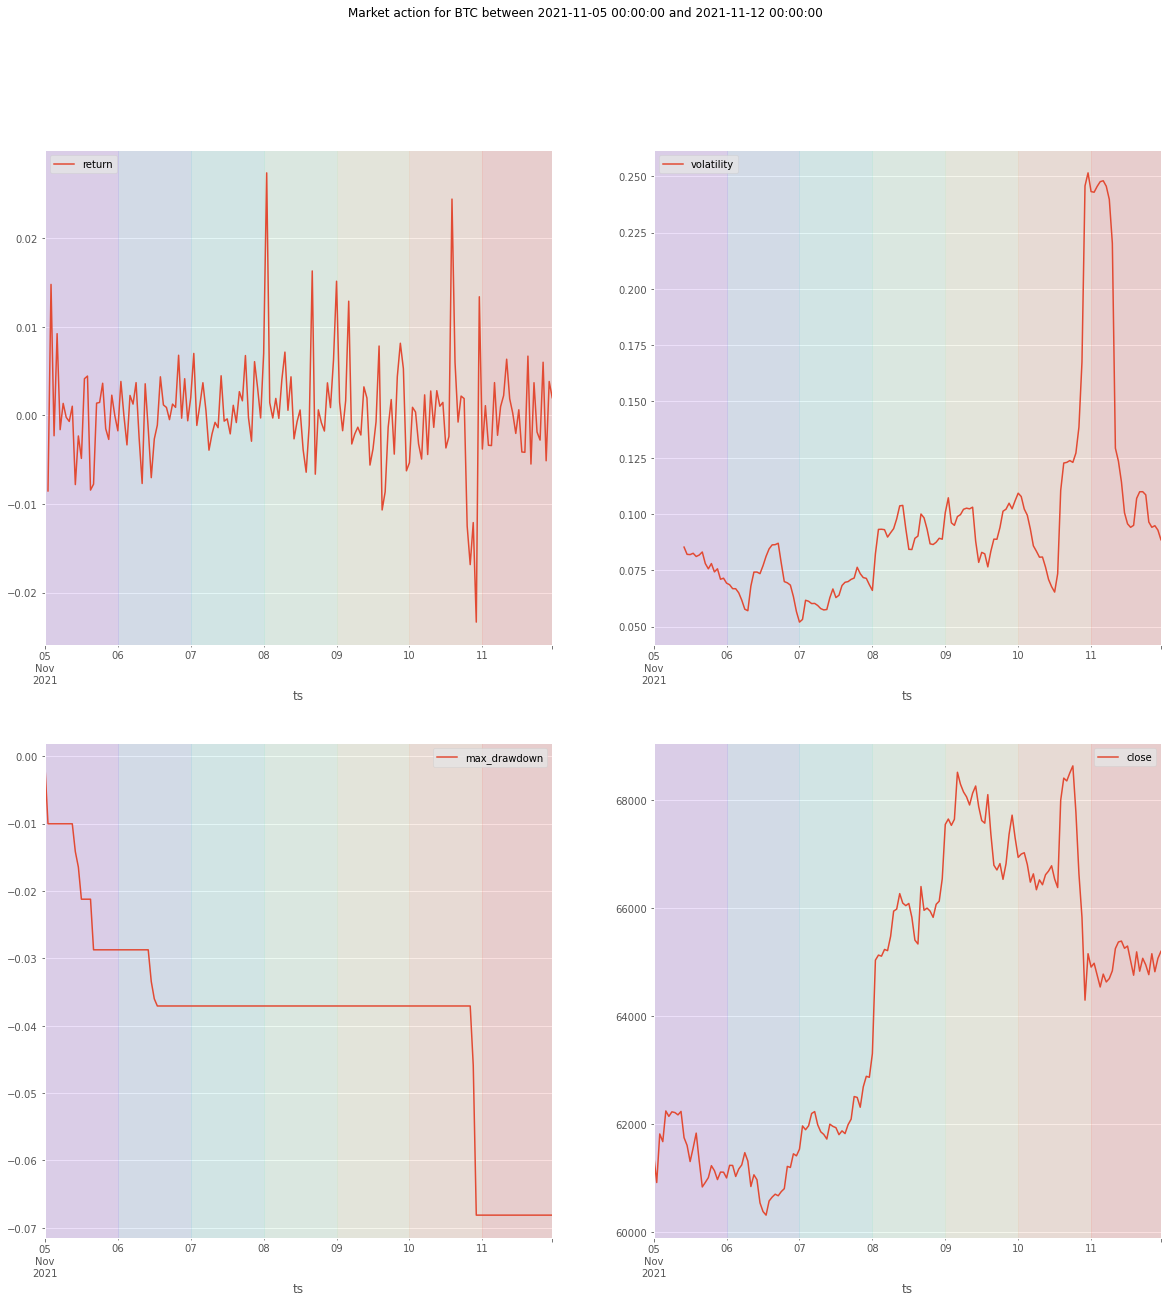

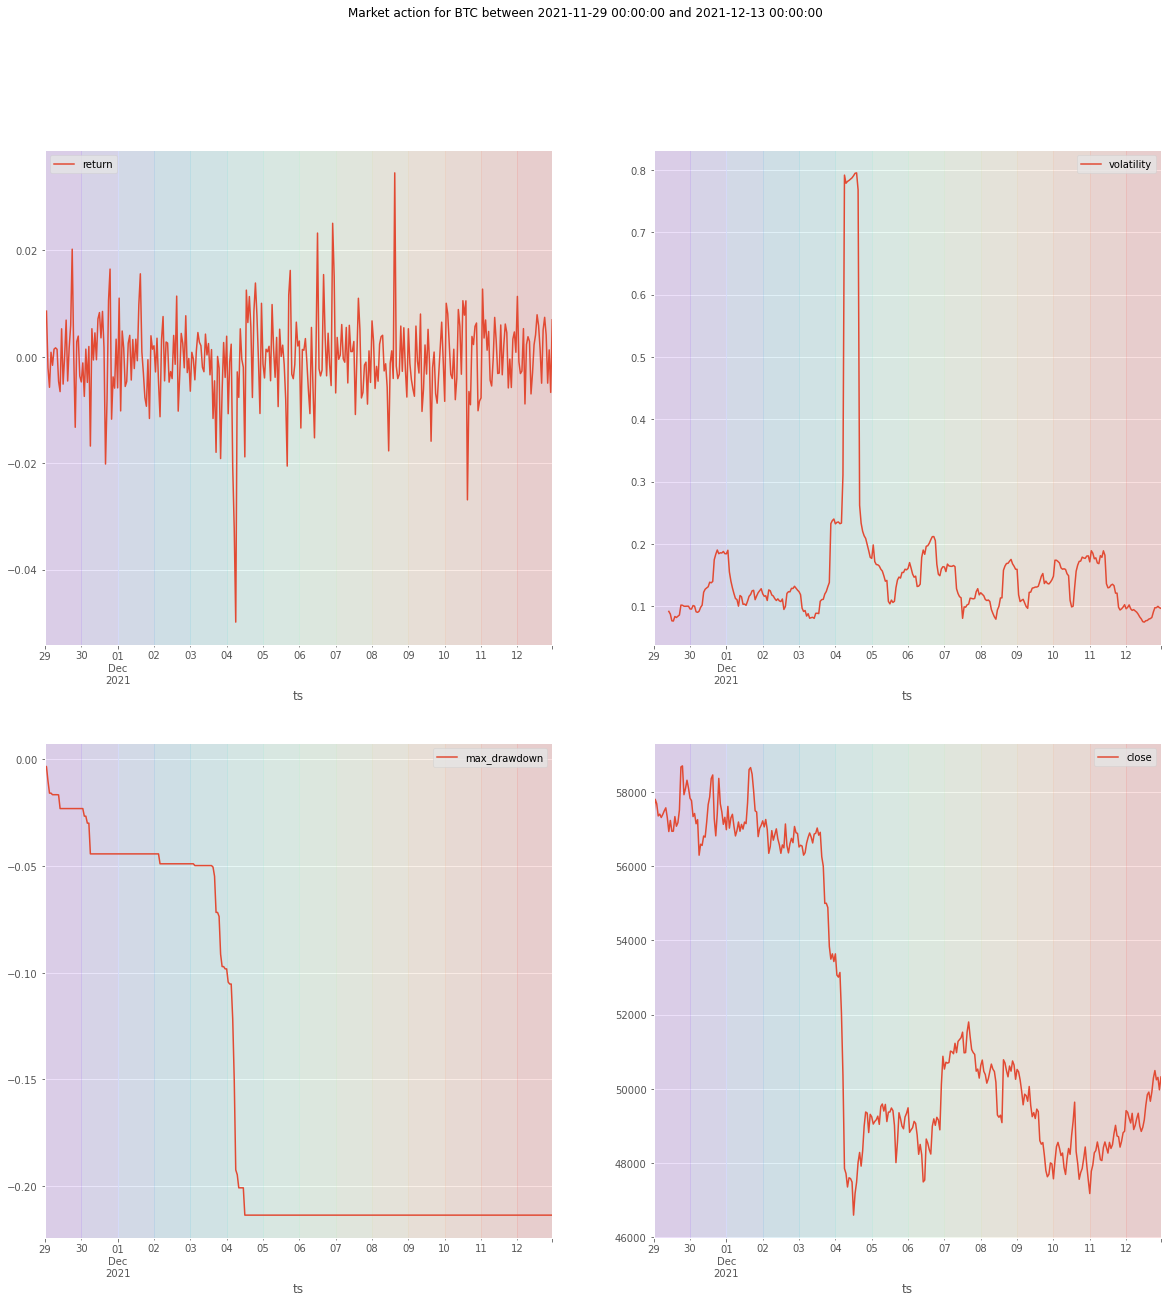

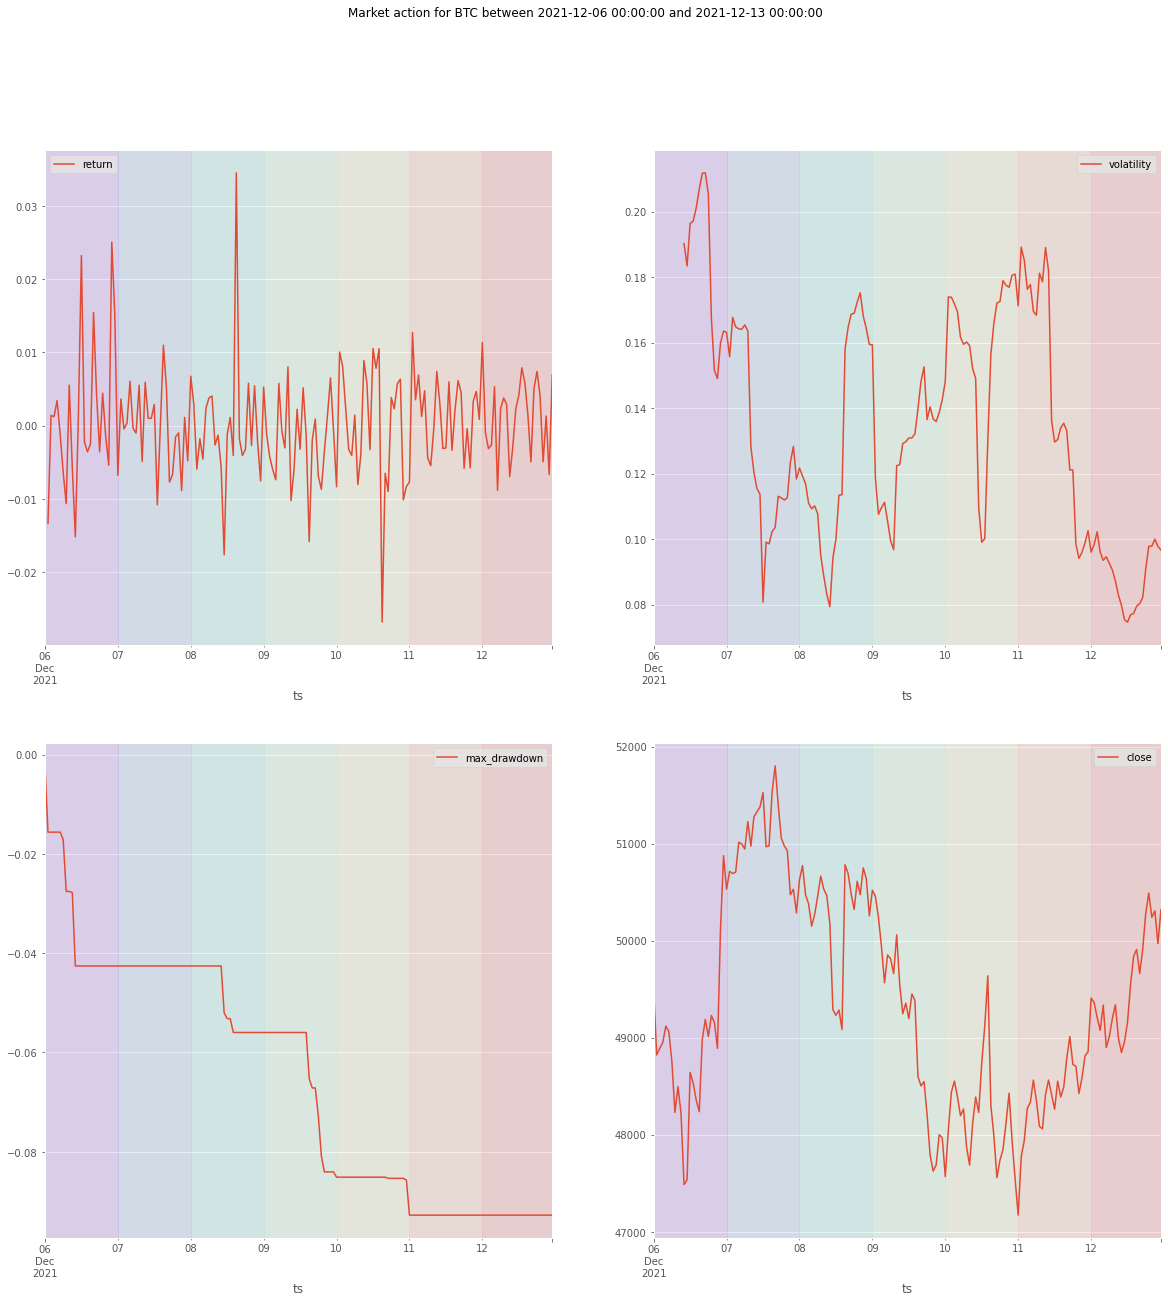

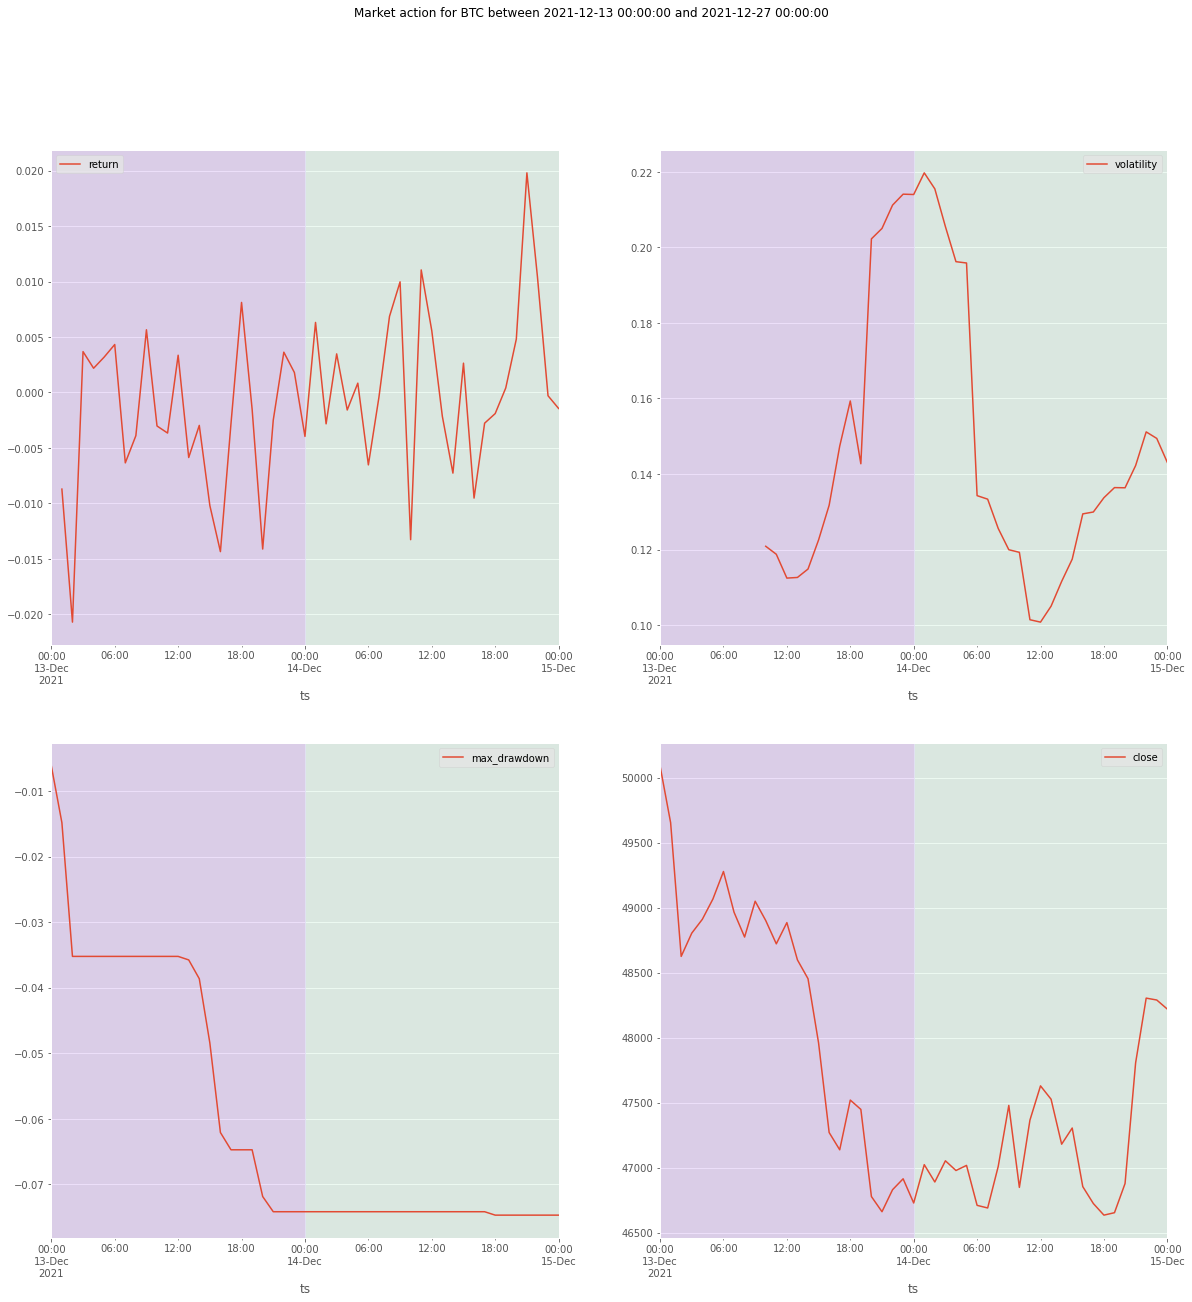

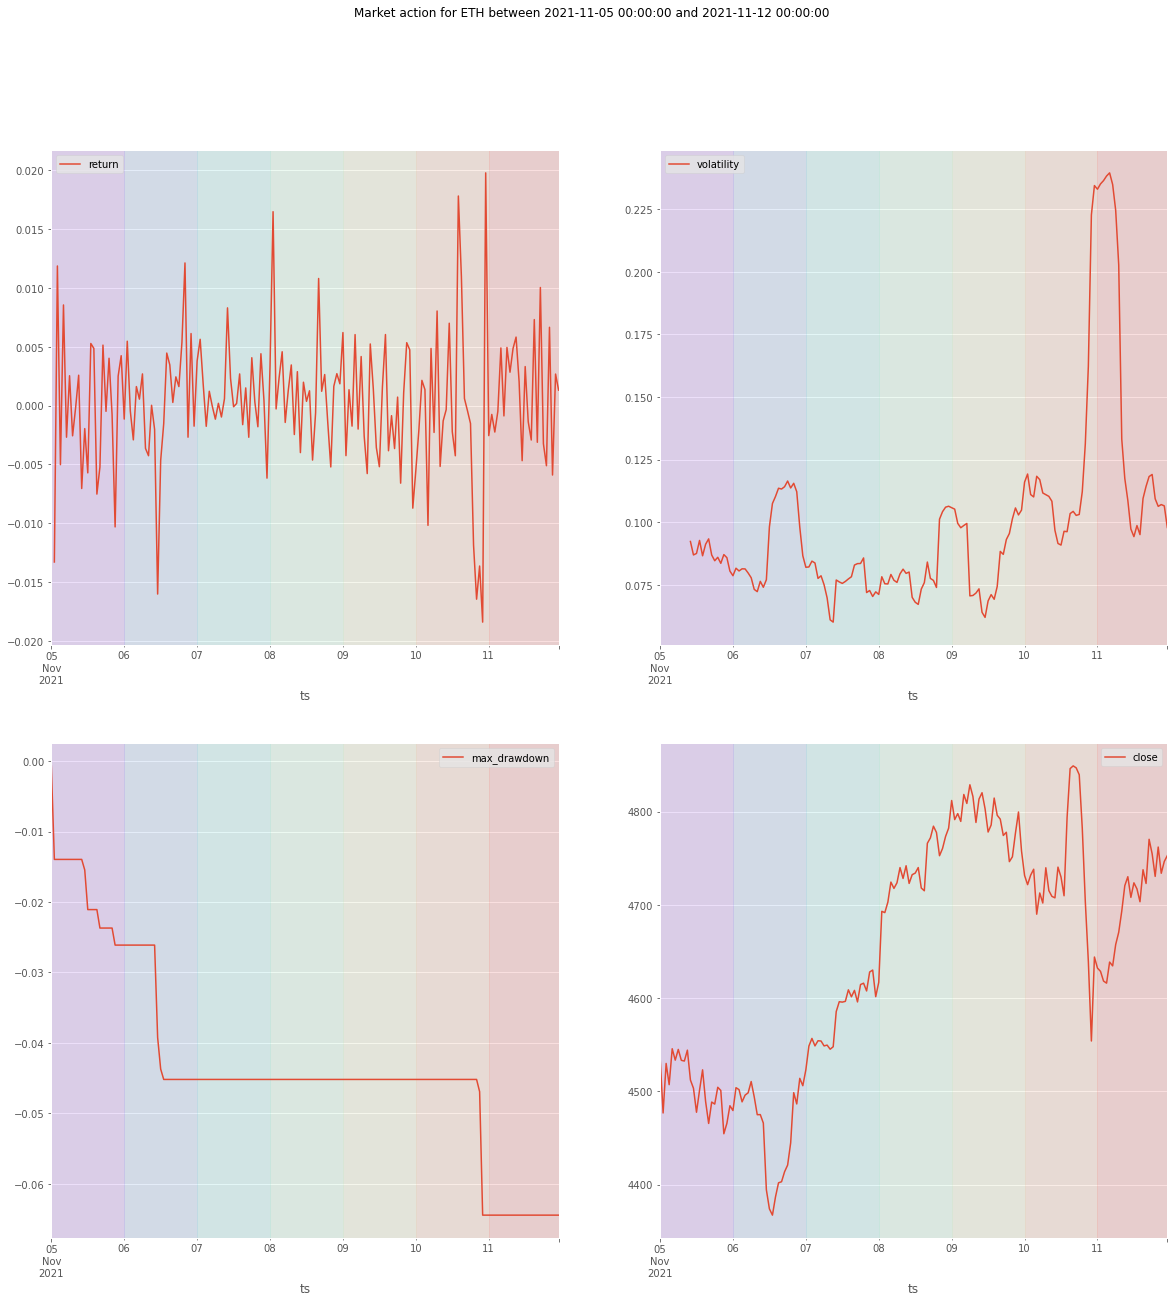

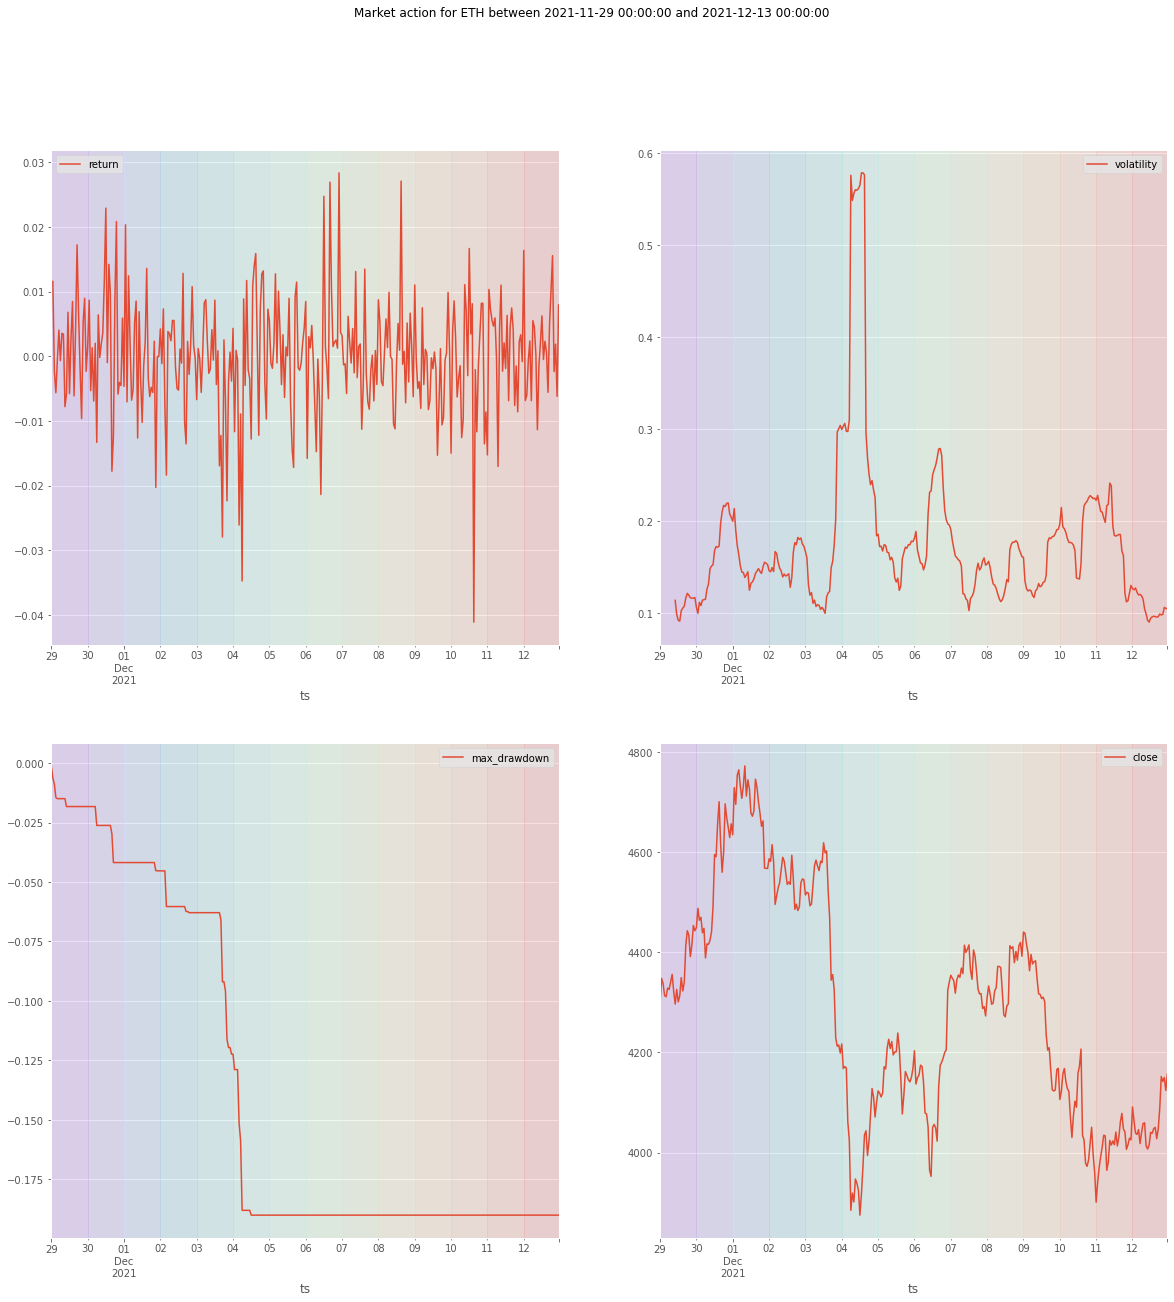

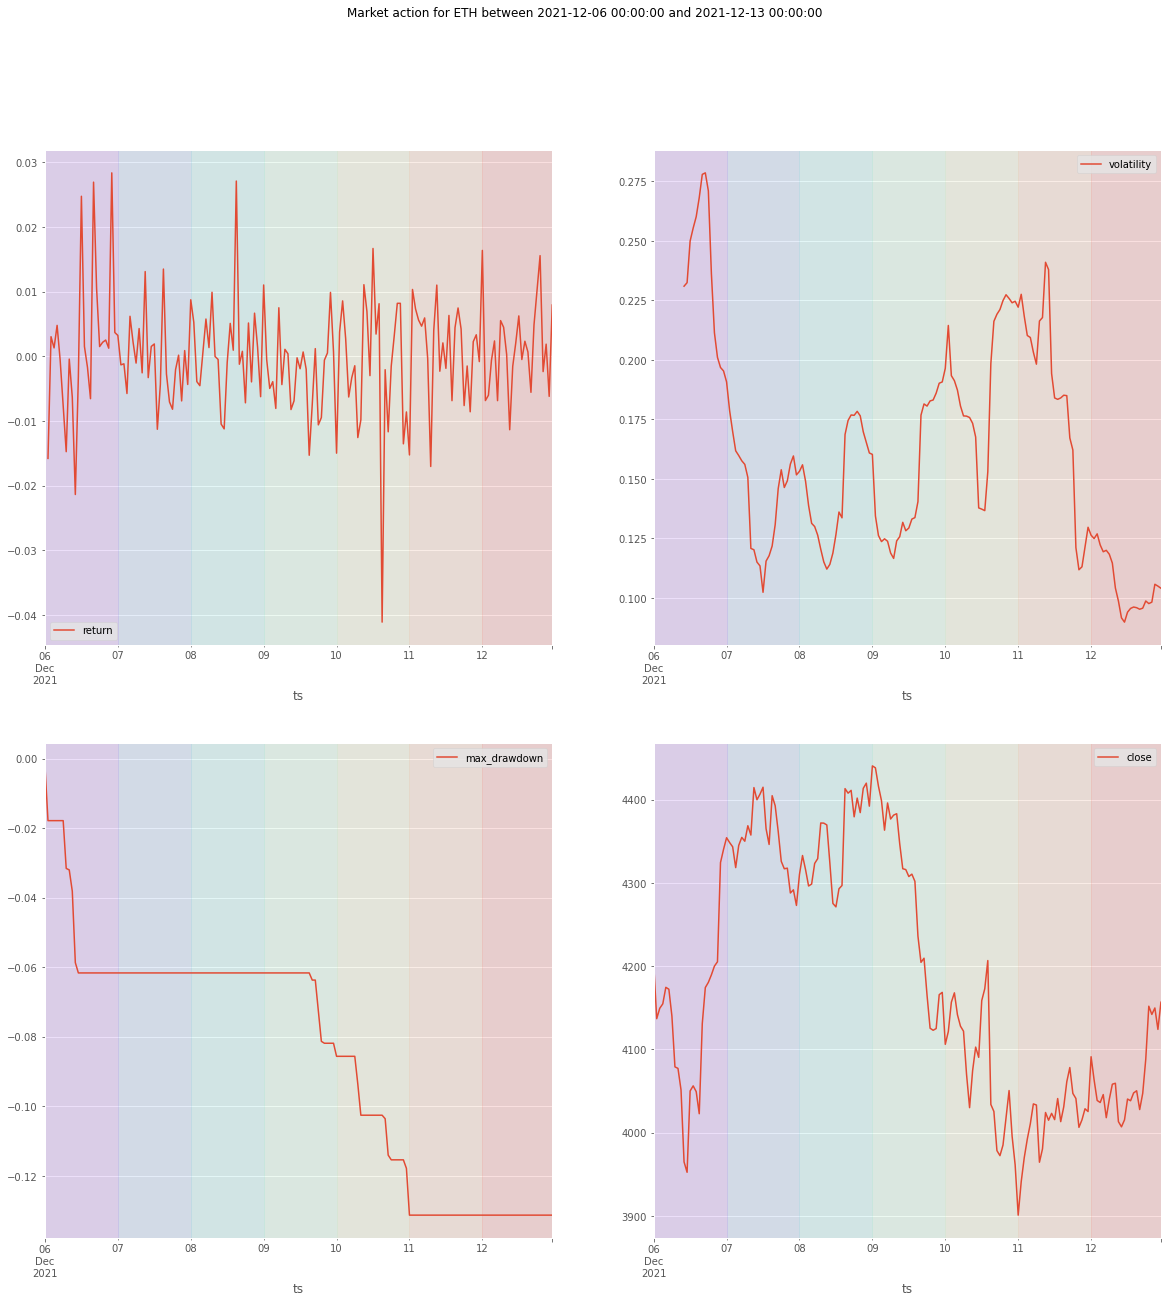

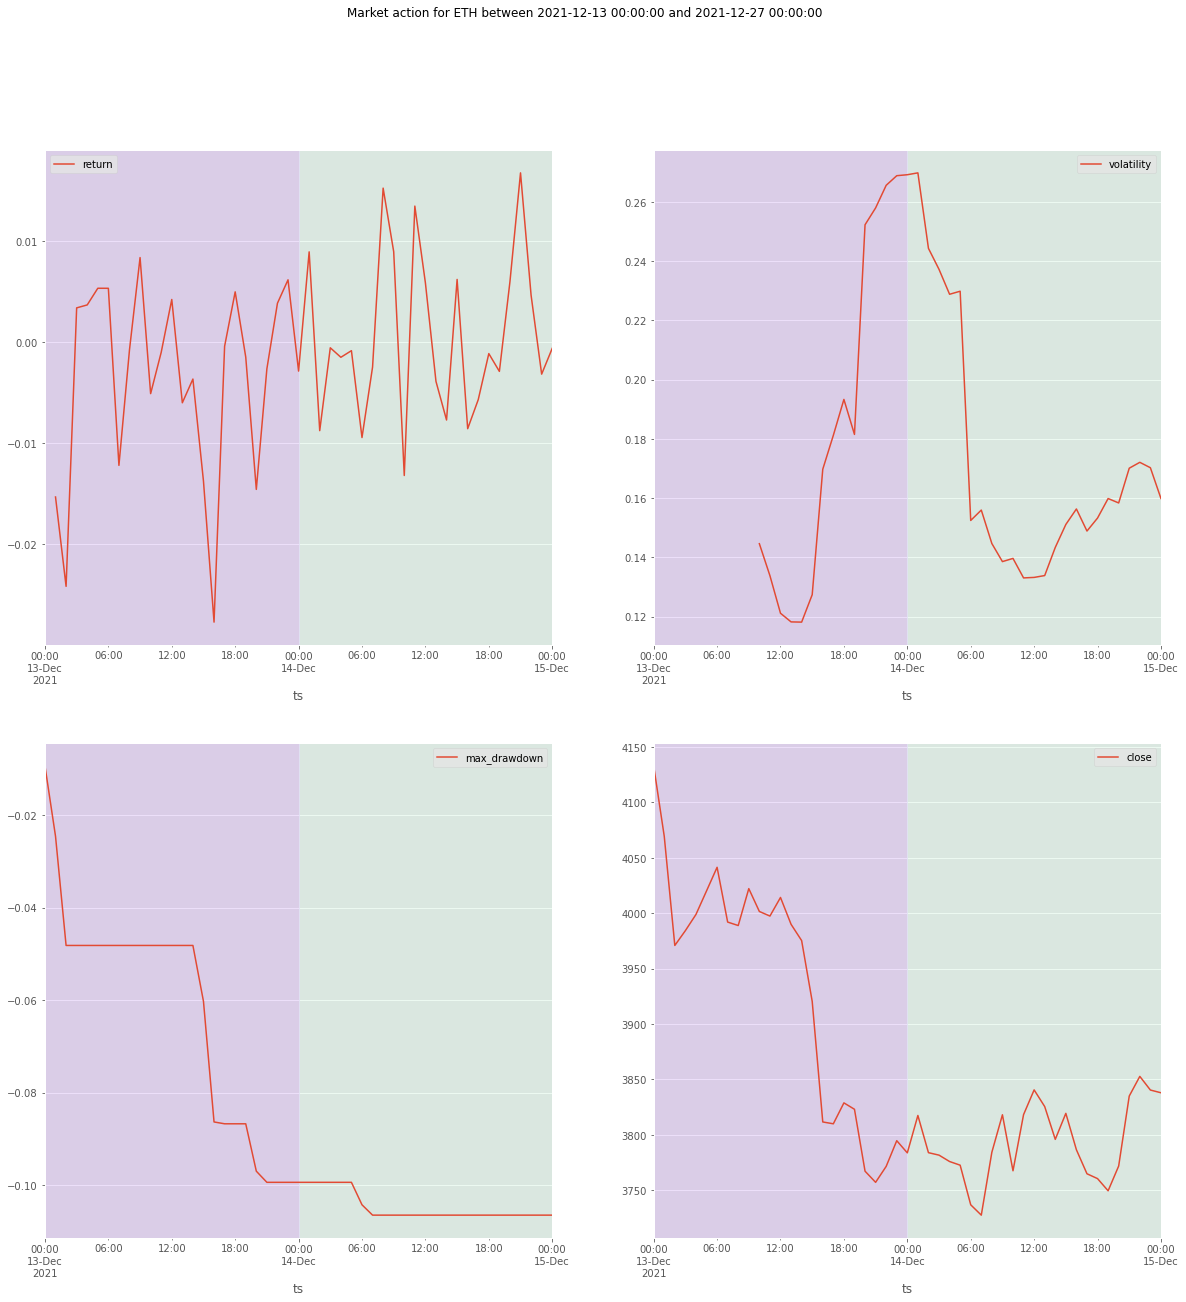

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]